# Purpose
Show the trimming of the data frames of the two provided CSV

In [ ]:
#|default_exp data_prep

In [137]:
import polars as pl

In [138]:
DATA_ROOT = "../../RevChemData/2025-06-12-python-outputs/2025-06-12-1948-new-reconciliation//"
!ls {DATA_ROOT}

2025-02-19 Pikachu               2025-03-11_Ninetail
2025-02-19_Ailleen_RE            2025-04-24_Totadile
2025-02-20_Hannah_tobii1         2025-05-05_Butterfree
2025-02-20_PinterestFiend        2025-05-05_Stephen-Kathy-Control
2025-02-21 Charmander            2025-05-06-Ditto
2025-02-21_Ponyta                2025-05-07_Eevee
2025-02-26_Elinor                2025-05-08_Relicanth
2025-02-26_Raichu                2025_03_03_Mew
2025-02-28_Flute                 2025_05_14_Manaphy
2025-03-03-H                     Fauna RealEye
2025-03-05_Blastoise             Recording10
2025-03-05_Luna                  Recording11
2025-03-06_Ozempic               Recording12
2025-03-07-Celebi                Recording13
2025-03-07-Cyndaquil             Recording8
2025-03-10-Dakrai                Recording9


In [ ]:
from pathlib import Path

In [ ]:

timeseries_schema = {"timestamp": pl.Datetime, "X": pl.Int32, "Y": pl.Int32}
paired_timeseries_schema = {
    "timestamp": pl.Datetime,
    "X": pl.Int32,
    "Y": pl.Int32,
    "timestamp_tobii": pl.Datetime,
    "X_tobii": pl.Int32,
    "Y_tobii": pl.Int32,
}

In [390]:
def load_csv_pair(trial_name: str) -> tuple[pl.DataFrame, pl.DataFrame]:
    try:
        tobii_csv = pl.read_csv(
            Path(DATA_ROOT, trial_name, "tobii.csv"), schema=timeseries_schema
        )
        re_csv = pl.read_csv(
            Path(DATA_ROOT, trial_name, "realeye.csv"), schema=timeseries_schema
        )
        return tobii_csv, re_csv
    except FileNotFoundError:
        print("Available trial names:")
        print([d.name for d in Path(DATA_ROOT).iterdir() if d.is_dir()])
        return None, None

In [141]:
tobii_csv, re_csv = load_csv_pair("2025-02-19 Pikachu")

In [142]:
pl.concat(
    [
        tobii_csv.head(),
        tobii_csv.tail().rename({"timestamp": "ts_tail", "X": "X_tail", "Y": "Y_tail"}),
    ],
    how="horizontal",
)

shape: (5, 6)
┌────────────────────────────┬──────┬──────┬────────────────────────────┬────────┬────────┐
│ timestamp                  ┆ X    ┆ Y    ┆ ts_tail                    ┆ X_tail ┆ Y_tail │
│ ---                        ┆ ---  ┆ ---  ┆ ---                        ┆ ---    ┆ ---    │
│ datetime[μs]               ┆ i32  ┆ i32  ┆ datetime[μs]               ┆ i32    ┆ i32    │
╞════════════════════════════╪══════╪══════╪════════════════════════════╪════════╪════════╡
│ 2025-02-19 20:06:09.486    ┆ null ┆ null ┆ 2025-02-19 20:17:20.959543 ┆ null   ┆ null   │
│ 2025-02-19 20:06:09.549181 ┆ null ┆ null ┆ 2025-02-19 20:17:20.967876 ┆ null   ┆ null   │
│ 2025-02-19 20:06:09.587351 ┆ null ┆ null ┆ 2025-02-19 20:17:20.976209 ┆ null   ┆ null   │
│ 2025-02-19 20:06:09.607207 ┆ null ┆ null ┆ 2025-02-19 20:17:20.980292 ┆ null   ┆ null   │
│ 2025-02-19 20:06:09.627150 ┆ null ┆ null ┆ 2025-02-19 20:17:21.147019 ┆ null   ┆ null   │
└────────────────────────────┴──────┴──────┴────────────────────────────┴────────┴────────┘

In [143]:
pl.concat(
    [
        re_csv.head(),
        re_csv.tail().rename({"timestamp": "ts_tail", "X": "X_tail", "Y": "Y_tail"}),
    ],
    how="horizontal",
)

shape: (5, 6)
┌─────────────────────────┬──────┬─────┬─────────────────────────┬────────┬────────┐
│ timestamp               ┆ X    ┆ Y   ┆ ts_tail                 ┆ X_tail ┆ Y_tail │
│ ---                     ┆ ---  ┆ --- ┆ ---                     ┆ ---    ┆ ---    │
│ datetime[μs]            ┆ i32  ┆ i32 ┆ datetime[μs]            ┆ i32    ┆ i32    │
╞═════════════════════════╪══════╪═════╪═════════════════════════╪════════╪════════╡
│ 2025-02-19 20:13:16.907 ┆ 960  ┆ 590 ┆ 2025-02-19 20:17:10.878 ┆ 1044   ┆ 555    │
│ 2025-02-19 20:13:16.933 ┆ 1041 ┆ 652 ┆ 2025-02-19 20:17:10.913 ┆ 1090   ┆ 616    │
│ 2025-02-19 20:13:16.962 ┆ 873  ┆ 580 ┆ 2025-02-19 20:17:10.937 ┆ 1243   ┆ 675    │
│ 2025-02-19 20:13:16.995 ┆ 873  ┆ 580 ┆ 2025-02-19 20:17:10.970 ┆ 1174   ┆ 629    │
│ 2025-02-19 20:13:17.022 ┆ 964  ┆ 626 ┆ 2025-02-19 20:17:11     ┆ 1221   ┆ 692    │
└─────────────────────────┴──────┴─────┴─────────────────────────┴────────┴────────┘

Comparing start times

In [144]:
tobii_csv.head(), re_csv.head()

(shape: (5, 3)
 ┌────────────────────────────┬──────┬──────┐
 │ timestamp                  ┆ X    ┆ Y    │
 │ ---                        ┆ ---  ┆ ---  │
 │ datetime[μs]               ┆ i32  ┆ i32  │
 ╞════════════════════════════╪══════╪══════╡
 │ 2025-02-19 20:06:09.486    ┆ null ┆ null │
 │ 2025-02-19 20:06:09.549181 ┆ null ┆ null │
 │ 2025-02-19 20:06:09.587351 ┆ null ┆ null │
 │ 2025-02-19 20:06:09.607207 ┆ null ┆ null │
 │ 2025-02-19 20:06:09.627150 ┆ null ┆ null │
 └────────────────────────────┴──────┴──────┘,
 shape: (5, 3)
 ┌─────────────────────────┬──────┬─────┐
 │ timestamp               ┆ X    ┆ Y   │
 │ ---                     ┆ ---  ┆ --- │
 │ datetime[μs]            ┆ i32  ┆ i32 │
 ╞═════════════════════════╪══════╪═════╡
 │ 2025-02-19 20:13:16.907 ┆ 960  ┆ 590 │
 │ 2025-02-19 20:13:16.933 ┆ 1041 ┆ 652 │
 │ 2025-02-19 20:13:16.962 ┆ 873  ┆ 580 │
 │ 2025-02-19 20:13:16.995 ┆ 873  ┆ 580 │
 │ 2025-02-19 20:13:17.022 ┆ 964  ┆ 626 │
 └─────────────────────────┴──────┴─────┘)

The above is 6 minutes difference, rather than something more narrow... Curious

In [145]:
example_data = pl.read_csv(
    DATA_ROOT + "/2025-02-19 Pikachu/joined.csv",
    schema_overrides=paired_timeseries_schema,
)  # .drop_nulls("X_tobii")

In [146]:
example_data.filter(pl.col("timestamp_tobii").min() > example_data["timestamp"].min())

shape: (0, 8)
┌─────────────────┬──────────────┬─────┬─────┬─────────────────┬─────────┬─────────┬────────────┐
│ test_created_at ┆ timestamp    ┆ X   ┆ Y   ┆ timestamp_tobii ┆ X_tobii ┆ Y_tobii ┆ source_tsv │
│ ---             ┆ ---          ┆ --- ┆ --- ┆ ---             ┆ ---     ┆ ---     ┆ ---        │
│ str             ┆ datetime[μs] ┆ i32 ┆ i32 ┆ datetime[μs]    ┆ i32     ┆ i32     ┆ str        │
╞═════════════════╪══════════════╪═════╪═════╪═════════════════╪═════════╪═════════╪════════════╡
└─────────────────┴──────────────┴─────┴─────┴─────────────────┴─────────┴─────────┴────────────┘

In [147]:
(
    example_data["timestamp_tobii"].min(),
    example_data["timestamp"].min(),
    example_data["timestamp"].max(),
    example_data["timestamp_tobii"].max(),
)

(datetime.datetime(2025, 2, 19, 20, 6, 9, 486000),
 datetime.datetime(2025, 2, 19, 20, 13, 16, 907000),
 datetime.datetime(2025, 2, 19, 20, 17, 11),
 datetime.datetime(2025, 2, 19, 20, 17, 21, 147019))

The above shows that `tobii_start < RE_start < RE_end < tobii_end`, which is the invariant we want

In [ ]:
from collections import defaultdict
from pprint import pprint

In [ ]:
def validate_directory(some_path: Path):
    should_be_dir = some_path.is_dir()
    assert should_be_dir, f"Path {some_path} is not a directory"


def check_all_directories_valid_joining(joined_csv_tree_root: Path):
    validate_directory(joined_csv_tree_root)

    directory_report = defaultdict(dict)

    for child_dir in (f for f in joined_csv_tree_root.iterdir() if f.is_dir()):
        validate_directory(child_dir)
        joined_record_from_dir = pl.read_csv(
            child_dir / "joined.csv",
            schema_overrides=paired_timeseries_schema,
        )

        output = directory_report[child_dir]
        # When is Tobii cut shorter than RealEye?
        # Tobii is cut short i.e. "ends first"
        tobii_first = (
            joined_record_from_dir["timestamp_tobii"].min()
            < joined_record_from_dir["timestamp"].min()
        )
        # Tobii is longer (as it should be) "ends last"
        tobii_last = (
            joined_record_from_dir["timestamp"].max()
            < joined_record_from_dir["timestamp_tobii"].max()
        )
        output["tobii starts first"] = tobii_first
        output["tobii ends after RealEye"] = tobii_last
        output["RealEye_length"] = joined_record_from_dir["timestamp"].count()
        output["tobii_length"] = joined_record_from_dir["timestamp_tobii"].count()
        output["Min-timestamp_tobii"] = joined_record_from_dir["timestamp_tobii"].min()
        output["Min-timestamp_RE"] = joined_record_from_dir["timestamp"].min()
        output["Max-timestamp_RE"] = joined_record_from_dir["timestamp"].max()
        output["Max-timestamp_tobii"] = joined_record_from_dir["timestamp_tobii"].max()

        # better than OR-ing in df.to_dict()
        # head = joined_record_from_dir.head(1)
        # for colum in head.columns:
        #     output[colum] = head[colum][0]

    for path, stats_dir in sorted(directory_report.items(), key=lambda tup: tup[0]):
        print(f"For {path.name}: we found")
        pprint(stats_dir, width=4)

        print("\n")

    return pl.DataFrame(
        map(lambda kv: kv[1] | {"trial_dir": kv[0]}, directory_report.items())
    )

In [149]:
all_directory_stats_check = check_all_directories_valid_joining(Path(DATA_ROOT + "/"))

For 2025-02-19 Pikachu: we found
{'Max-timestamp_RE': datetime.datetime(2025, 2, 19, 20, 17, 11),
 'Max-timestamp_tobii': datetime.datetime(2025, 2, 19, 20, 17, 21, 147019),
 'Min-timestamp_RE': datetime.datetime(2025, 2, 19, 20, 13, 16, 907000),
 'Min-timestamp_tobii': datetime.datetime(2025, 2, 19, 20, 6, 9, 486000),
 'RealEye_length': 7308,
 'tobii ends after RealEye': True,
 'tobii starts first': True,
 'tobii_length': 86942}


For 2025-02-19_Ailleen_RE: we found
{'Max-timestamp_RE': datetime.datetime(2025, 2, 19, 21, 42, 2),
 'Max-timestamp_tobii': datetime.datetime(2025, 2, 19, 21, 43, 2, 911318),
 'Min-timestamp_RE': datetime.datetime(2025, 2, 19, 21, 38, 7, 869000),
 'Min-timestamp_tobii': datetime.datetime(2025, 2, 19, 21, 34, 33, 635000),
 'RealEye_length': 7296,
 'tobii ends after RealEye': True,
 'tobii starts first': True,
 'tobii_length': 62474}


For 2025-02-20_Hannah_tobii1: we found
{'Max-timestamp_RE': datetime.datetime(2025, 2, 20, 22, 10, 50),
 'Max-timestamp_tobii'

In [150]:
with pl.Config(tbl_rows=35):
    display(all_directory_stats_check.sort("Min-timestamp_tobii"))

shape: (32, 9)
┌───────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬──────────┐
│ tobii     ┆ tobii     ┆ RealEye_l ┆ tobii_len ┆ … ┆ Min-times ┆ Max-times ┆ Max-times ┆ trial_di │
│ starts    ┆ ends      ┆ ength     ┆ gth       ┆   ┆ tamp_RE   ┆ tamp_RE   ┆ tamp_tobi ┆ r        │
│ first     ┆ after     ┆ ---       ┆ ---       ┆   ┆ ---       ┆ ---       ┆ i         ┆ ---      │
│ ---       ┆ RealEye   ┆ i64       ┆ i64       ┆   ┆ datetime[ ┆ datetime[ ┆ ---       ┆ object   │
│ bool      ┆ ---       ┆           ┆           ┆   ┆ μs]       ┆ μs]       ┆ datetime[ ┆          │
│           ┆ bool      ┆           ┆           ┆   ┆           ┆           ┆ μs]       ┆          │
╞═══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪══════════╡
│ true      ┆ true      ┆ 7251      ┆ 56539     ┆ … ┆ 2024-10-2 ┆ 2024-10-2 ┆ 2024-10-2 ┆ ../../Re │
│           ┆           ┆           ┆           ┆   ┆ 5 20:49:3 ┆ 5         ┆ 5 20:53:4 ┆ vChemDat │
│           ┆           ┆           ┆           ┆   ┆ 0.922     ┆ 20:53:25  ┆ 5.041083  ┆ a/2025-0 │
│           ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆ 6-12-p…  │
│ true      ┆ true      ┆ 7278      ┆ 59291     ┆ … ┆ 2024-10-3 ┆ 2024-10-3 ┆ 2024-10-3 ┆ ../../Re │
│           ┆           ┆           ┆           ┆   ┆ 0 16:34:0 ┆ 0         ┆ 0 16:38:1 ┆ vChemDat │
│           ┆           ┆           ┆           ┆   ┆ 2.920     ┆ 16:37:57  ┆ 0.284200  ┆ a/2025-0 │
│           ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆ 6-12-p…  │
│ true      ┆ true      ┆ 7292      ┆ 65538     ┆ … ┆ 2024-11-0 ┆ 2024-11-0 ┆ 2024-11-0 ┆ ../../Re │
│           ┆           ┆           ┆           ┆   ┆ 1 20:27:4 ┆ 1         ┆ 1 20:31:5 ┆ vChemDat │
│           ┆           ┆           ┆           ┆   ┆ 2.967     ┆ 20:31:37  ┆ 0.801824  ┆ a/2025-0 │
│           ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆ 6-12-p…  │
│ true      ┆ true      ┆ 7266      ┆ 53806     ┆ … ┆ 2024-11-0 ┆ 2024-11-0 ┆ 2024-11-0 ┆ ../../Re │
│           ┆           ┆           ┆           ┆   ┆ 7 19:45:3 ┆ 7         ┆ 7 19:49:4 ┆ vChemDat │
│           ┆           ┆           ┆           ┆   ┆ 8.947     ┆ 19:49:33  ┆ 2.484454  ┆ a/2025-0 │
│           ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆ 6-12-p…  │
│ true      ┆ true      ┆ 7250      ┆ 59073     ┆ … ┆ 2024-11-1 ┆ 2024-11-1 ┆ 2024-11-1 ┆ ../../Re │
│           ┆           ┆           ┆           ┆   ┆ 5 21:38:2 ┆ 5         ┆ 5 21:43:2 ┆ vChemDat │
│           ┆           ┆           ┆           ┆   ┆ 4.928     ┆ 21:42:19  ┆ 0.627146  ┆ a/2025-0 │
│           ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆ 6-12-p…  │
│ true      ┆ true      ┆ 7308      ┆ 86942     ┆ … ┆ 2025-02-1 ┆ 2025-02-1 ┆ 2025-02-1 ┆ ../../Re │
│           ┆           ┆           ┆           ┆   ┆ 9 20:13:1 ┆ 9         ┆ 9 20:17:2 ┆ vChemDat │
│           ┆           ┆           ┆           ┆   ┆ 6.907     ┆ 20:17:11  ┆ 1.147019  ┆ a/2025-0 │
│           ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆ 6-12-p…  │
│ true      ┆ true      ┆ 7296      ┆ 62474     ┆ … ┆ 2025-02-1 ┆ 2025-02-1 ┆ 2025-02-1 ┆ ../../Re │
│           ┆           ┆           ┆           ┆   ┆ 9 21:38:0 ┆ 9         ┆ 9 21:43:0 ┆ vChemDat │
│           ┆           ┆           ┆           ┆   ┆ 7.869     ┆ 21:42:02  ┆ 2.911318  ┆ a/2025-0 │
│           ┆           ┆           ┆           ┆   ┆           ┆           ┆           ┆ 6-12-p…  │
│ true      ┆ true      ┆ 7322      ┆ 53345     ┆ … ┆ 2025-02-2 ┆ 2025-02-2 ┆ 2025-02-2 ┆ ../../Re │
│           ┆           ┆           ┆           ┆   ┆ 0 22:06:5 ┆ 0         ┆ 0 22:11:0 ┆ vChemDat │
│           ┆           ┆           ┆           ┆   ┆ 5.880     ┆ 22:10:50  ┆ 3.215130  ┆ a/2025-0 │
│           ┆           ┆           ┆         

In [151]:
description = all_directory_stats_check[
    ["tobii starts first", "tobii ends after RealEye"]
].describe()
display(description)

shape: (9, 3)
┌────────────┬────────────────────┬──────────────────────────┐
│ statistic  ┆ tobii starts first ┆ tobii ends after RealEye │
│ ---        ┆ ---                ┆ ---                      │
│ str        ┆ f64                ┆ f64                      │
╞════════════╪════════════════════╪══════════════════════════╡
│ count      ┆ 32.0               ┆ 32.0                     │
│ null_count ┆ 0.0                ┆ 0.0                      │
│ mean       ┆ 1.0                ┆ 1.0                      │
│ std        ┆ null               ┆ null                     │
│ min        ┆ 1.0                ┆ 1.0                      │
│ 25%        ┆ null               ┆ null                     │
│ 50%        ┆ null               ┆ null                     │
│ 75%        ┆ null               ┆ null                     │
│ max        ┆ 1.0                ┆ 1.0                      │
└────────────┴────────────────────┴──────────────────────────┘

In [152]:
all_directory_stats_check.filter(
    ~pl.col("tobii ends after RealEye") & pl.col("tobii starts first")
)

shape: (0, 9)
┌───────────┬───────────┬───────────┬───────────┬───┬───────────┬───────────┬───────────┬──────────┐
│ tobii     ┆ tobii     ┆ RealEye_l ┆ tobii_len ┆ … ┆ Min-times ┆ Max-times ┆ Max-times ┆ trial_di │
│ starts    ┆ ends      ┆ ength     ┆ gth       ┆   ┆ tamp_RE   ┆ tamp_RE   ┆ tamp_tobi ┆ r        │
│ first     ┆ after     ┆ ---       ┆ ---       ┆   ┆ ---       ┆ ---       ┆ i         ┆ ---      │
│ ---       ┆ RealEye   ┆ i64       ┆ i64       ┆   ┆ datetime[ ┆ datetime[ ┆ ---       ┆ object   │
│ bool      ┆ ---       ┆           ┆           ┆   ┆ μs]       ┆ μs]       ┆ datetime[ ┆          │
│           ┆ bool      ┆           ┆           ┆   ┆           ┆           ┆ μs]       ┆          │
╞═══════════╪═══════════╪═══════════╪═══════════╪═══╪═══════════╪═══════════╪═══════════╪══════════╡
└───────────┴───────────┴───────────┴───────────┴───┴───────────┴───────────┴───────────┴──────────┘

# Working with the pairings

In [153]:
tobii_csv, re_csv = load_csv_pair("2025-03-10-Dakrai")
pl.concat(
    [
        re_csv.head(),
        re_csv.tail().rename({"timestamp": "ts_tail", "X": "X_tail", "Y": "Y_tail"}),
    ],
    how="horizontal",
)

shape: (5, 6)
┌─────────────────────────┬─────┬─────┬─────────────────────────┬────────┬────────┐
│ timestamp               ┆ X   ┆ Y   ┆ ts_tail                 ┆ X_tail ┆ Y_tail │
│ ---                     ┆ --- ┆ --- ┆ ---                     ┆ ---    ┆ ---    │
│ datetime[μs]            ┆ i32 ┆ i32 ┆ datetime[μs]            ┆ i32    ┆ i32    │
╞═════════════════════════╪═════╪═════╪═════════════════════════╪════════╪════════╡
│ 2025-03-10 20:41:24.936 ┆ 773 ┆ 501 ┆ 2025-03-10 20:45:18.870 ┆ 808    ┆ 664    │
│ 2025-03-10 20:41:24.982 ┆ 875 ┆ 409 ┆ 2025-03-10 20:45:18.905 ┆ 858    ┆ 677    │
│ 2025-03-10 20:41:25.013 ┆ 820 ┆ 431 ┆ 2025-03-10 20:45:18.937 ┆ 861    ┆ 648    │
│ 2025-03-10 20:41:25.025 ┆ 817 ┆ 449 ┆ 2025-03-10 20:45:18.966 ┆ 859    ┆ 678    │
│ 2025-03-10 20:41:25.064 ┆ 757 ┆ 483 ┆ 2025-03-10 20:45:19     ┆ 867    ┆ 688    │
└─────────────────────────┴─────┴─────┴─────────────────────────┴────────┴────────┘

In [ ]:
tobii_csv.with_row_index().filter(
    pl.col("timestamp")
    > (
        tobii_csv["timestamp"].min()
        + (re_csv["timestamp"].min() - tobii_csv["timestamp"].min())
    )
)

shape: (29_261, 4)
┌───────┬────────────────────────────┬──────┬──────┐
│ index ┆ timestamp                  ┆ X    ┆ Y    │
│ ---   ┆ ---                        ┆ ---  ┆ ---  │
│ u32   ┆ datetime[μs]               ┆ i32  ┆ i32  │
╞═══════╪════════════════════════════╪══════╪══════╡
│ 38145 ┆ 2025-03-10 20:41:24.939259 ┆ 1391 ┆ 217  │
│ 38146 ┆ 2025-03-10 20:41:24.947589 ┆ 1392 ┆ 219  │
│ 38147 ┆ 2025-03-10 20:41:24.955922 ┆ 1391 ┆ 224  │
│ 38148 ┆ 2025-03-10 20:41:24.964255 ┆ 1391 ┆ 216  │
│ 38149 ┆ 2025-03-10 20:41:24.972588 ┆ 1389 ┆ 226  │
│ …     ┆ …                          ┆ …    ┆ …    │
│ 67401 ┆ 2025-03-10 20:45:26.933600 ┆ 1883 ┆ 1090 │
│ 67402 ┆ 2025-03-10 20:45:26.941934 ┆ 1874 ┆ 1105 │
│ 67403 ┆ 2025-03-10 20:45:26.950267 ┆ 1880 ┆ 1070 │
│ 67404 ┆ 2025-03-10 20:45:26.958599 ┆ 1887 ┆ 1094 │
│ 67405 ┆ 2025-03-10 20:45:27.129296 ┆ null ┆ null │
└───────┴────────────────────────────┴──────┴──────┘

In [ ]:
with pl.Config(tbl_rows=35):
    display(
        tobii_csv.join_asof(
            re_csv,
            left_on="timestamp",
            right_on="timestamp",  # becomes "timestamp_right"
            strategy="backward",
            coalesce=False,
        )
        .rename(
            {"timestamp_right": "timestamp_RE", "X_right": "X_RE", "Y_right": "Y_RE"}
        )
        .with_row_index()
        .filter(  # show me just the tobii data that is aligned with the RealEye data points
            pl.col("timestamp")
            > (
                tobii_csv["timestamp"].min()
                + (re_csv["timestamp"].min() - tobii_csv["timestamp"].min())
            )
        )
    )

shape: (29_261, 7)
┌───────┬────────────────────────────┬──────┬──────┬─────────────────────────┬──────┬──────┐
│ index ┆ timestamp                  ┆ X    ┆ Y    ┆ timestamp_RE            ┆ X_RE ┆ Y_RE │
│ ---   ┆ ---                        ┆ ---  ┆ ---  ┆ ---                     ┆ ---  ┆ ---  │
│ u32   ┆ datetime[μs]               ┆ i32  ┆ i32  ┆ datetime[μs]            ┆ i32  ┆ i32  │
╞═══════╪════════════════════════════╪══════╪══════╪═════════════════════════╪══════╪══════╡
│ 38145 ┆ 2025-03-10 20:41:24.939259 ┆ 1391 ┆ 217  ┆ 2025-03-10 20:41:24.936 ┆ 773  ┆ 501  │
│ 38146 ┆ 2025-03-10 20:41:24.947589 ┆ 1392 ┆ 219  ┆ 2025-03-10 20:41:24.936 ┆ 773  ┆ 501  │
│ 38147 ┆ 2025-03-10 20:41:24.955922 ┆ 1391 ┆ 224  ┆ 2025-03-10 20:41:24.936 ┆ 773  ┆ 501  │
│ 38148 ┆ 2025-03-10 20:41:24.964255 ┆ 1391 ┆ 216  ┆ 2025-03-10 20:41:24.936 ┆ 773  ┆ 501  │
│ 38149 ┆ 2025-03-10 20:41:24.972588 ┆ 1389 ┆ 226  ┆ 2025-03-10 20:41:24.936 ┆ 773  ┆ 501  │
│ 38150 ┆ 2025-03-10 20:41:24.980922 ┆ 1389 ┆ 212  ┆ 2025-03-10 20:41:24.936 ┆ 773  ┆ 501  │
│ 38151 ┆ 2025-03-10 20:41:24.989255 ┆ 1387 ┆ 215  ┆ 2025-03-10 20:41:24.982 ┆ 875  ┆ 409  │
│ 38152 ┆ 2025-03-10 20:41:24.997588 ┆ 1403 ┆ 204  ┆ 2025-03-10 20:41:24.982 ┆ 875  ┆ 409  │
│ 38153 ┆ 2025-03-10 20:41:25.005921 ┆ 1390 ┆ 209  ┆ 2025-03-10 20:41:24.982 ┆ 875  ┆ 409  │
│ 38154 ┆ 2025-03-10 20:41:25.014254 ┆ 1395 ┆ 193  ┆ 2025-03-10 20:41:25.013 ┆ 820  ┆ 431  │
│ 38155 ┆ 2025-03-10 20:41:25.022588 ┆ 1382 ┆ 390  ┆ 2025-03-10 20:41:25.013 ┆ 820  ┆ 431  │
│ 38156 ┆ 2025-03-10 20:41:25.030921 ┆ 1038 ┆ 1019 ┆ 2025-03-10 20:41:25.025 ┆ 817  ┆ 449  │
│ 38157 ┆ 2025-03-10 20:41:25.039254 ┆ null ┆ null ┆ 2025-03-10 20:41:25.025 ┆ 817  ┆ 449  │
│ 38158 ┆ 2025-03-10 20:41:25.047586 ┆ null ┆ null ┆ 2025-03-10 20:41:25.025 ┆ 817  ┆ 449  │
│ 38159 ┆ 2025-03-10 20:41:25.055921 ┆ null ┆ null ┆ 2025-03-10 20:41:25.025 ┆ 817  ┆ 449  │
│ 38160 ┆ 2025-03-10 20:41:25.064254 ┆ null ┆ null ┆ 2025-03-10 20:41:25.064 ┆ 757  ┆ 483  │
│ 38161 ┆ 2025-03-10 20:41:25.072588 ┆ null ┆ null ┆ 2025-03-10 20:41:25.064 ┆ 757  ┆ 483  │
│ 38162 ┆ 2025-03-10 20:41:25.080921 ┆ null ┆ null ┆ 2025-03-10 20:41:25.064 ┆ 757  ┆ 483  │
│ …     ┆ …                          ┆ …    ┆ …    ┆ …                       ┆ …    ┆ …    │
│ 67389 ┆ 2025-03-10 20:45:26.848382 ┆ null ┆ null ┆ 2025-03-10 20:45:19     ┆ 867  ┆ 688  │
│ 67390 ┆ 2025-03-10 20:45:26.848382 ┆ null ┆ null ┆ 2025-03-10 20:45:19     ┆ 867  ┆ 688  │
│ 67391 ┆ 2025-03-10 20:45:26.850277 ┆ 1796 ┆ 1078 ┆ 2025-03-10 20:45:19     ┆ 867  ┆ 688  │
│ 67392 ┆ 2025-03-10 20:45:26.858610 ┆ 1901 ┆ 1144 ┆ 2025-03-10 20:45:19     ┆ 867  ┆ 688  │
│ 67393 ┆ 2025-03-10 20:45:26.866944 ┆ 1697 ┆ 1128 ┆ 2025-03-10 20:45:19     ┆ 867  ┆ 688  │
│ 67394 ┆ 2025-03-10 20:45:26.875277 ┆ 1919 ┆ 1093 ┆ 2025-03-10 20:45:19     ┆ 867  ┆ 688  │
│ 67395 ┆ 2025-03-10 20:45:26.883608 ┆ 2490 ┆ 1140 ┆ 2025-03-10 20:45:19     ┆ 867  ┆ 688  │
│ 67396 ┆ 2025-03-10 20:45:26.891942 ┆ 1911 ┆ 1122 ┆ 2025-03-10 20:45:19     ┆ 867  ┆ 688  │
│ 67397 ┆ 2025-03-10 20:45:26.900273 ┆ 1861 ┆ 1058 ┆ 2025-03-10 20:45:19     ┆ 867  ┆ 688  │
│ 67398 ┆ 2025-03-10 20:45:26.908601 ┆ 1889 ┆ 1072 ┆ 2025-03-10 20:45:19     ┆ 867  ┆ 688  │
│ 67399 ┆ 2025-03-10 20:45:26.916935 ┆ 1821 ┆ 1135 ┆ 2025-03-10 20:45:19     ┆ 867  ┆ 688  │
│ 67400 ┆ 2025-03-10 20:45:26.925267 ┆ 1902 ┆ 1109 ┆ 2025-03-10 20:45:19     ┆ 867  ┆ 688  │
│ 67401 ┆ 2025-03-10 20:45:26.933600 ┆ 1883 ┆ 1090 ┆ 2025-03-10 20:45:19     ┆ 867  ┆ 688  │
│ 67402 ┆ 2025-03-10 20:45:26.941934 ┆ 1874 ┆ 1105 ┆ 2025-03-10 20:45:19     ┆ 867  ┆ 688  │
│ 67403 ┆ 2025-03-10 20:45:26.950267 ┆ 1880 ┆ 1070 ┆ 2025-03-10 20:45:19     ┆ 867  ┆ 688  │
│ 67404 ┆ 2025-03-10 20:45:26.958599 ┆ 1887 ┆ 1094 ┆ 2025-03-10 20:45:19     ┆ 867  ┆ 688  │
│ 67405 ┆ 2025-03-10 20:45:27.129296 ┆ null ┆ null ┆ 2025-03-10 20:45:19     ┆ 867  ┆ 688  │
└───────┴────────────────────────────┴──────┴──────┴─────────────────────────┴──────┴──────┘

In [ ]:
# | export


def align_data(
    tobii_df: pl.DataFrame, re_df: pl.DataFrame, *, asof_strategy="backward"
):
    """Align Tobii and RealEye dataframes

    Keyword Args:
        - asof_strategy: strategy for filling on join (Default: "backward")
    """
    tobii_df = tobii_df.sort(by="timestamp")
    re_df = re_df.sort(by="timestamp")
    df_aligned = (
        tobii_df.rename({"X": "X_tobii", "Y": "Y_tobii"})
        .join_asof(
            re_df.rename({"timestamp": "timestamp_RE", "X": "X_RE", "Y": "Y_RE"}),
            left_on="timestamp",
            right_on="timestamp_RE",  # ?: becomes "timestamp_right"
            strategy=asof_strategy,
            coalesce=False,
        )
        .filter(  # just the tobii data that is aligned with the RealEye data points
            pl.col("timestamp")
            > (
                tobii_df["timestamp"].min()
                + (re_df["timestamp"].min() - tobii_df["timestamp"].min())
            )
        )
        .rename({"timestamp": "timestamp_tobii"})
    )
    # this interpolation is probably unnecessary, because the strategy does this in the background
    df_aligned = df_aligned.with_columns(
        pl.col("X_RE").interpolate().alias("X_RE_interp"),
        pl.col("Y_RE").interpolate().alias("Y_RE_interp"),
    )
    return df_aligned

In [ ]:
import polars.selectors as cs

In [ ]:
def separate_aligned_to_source(
    aligned_df: pl.DataFrame,
    *,
    correct_naming: bool=False
) -> tuple[pl.DataFrame, pl.DataFrame]:

    selector_tobii = cs.ends_with("_tobii")
    selector_realeye = cs.ends_with("_RE")


    tobii_out, re_out = aligned_df.select(selector_tobii), aligned_df.select(selector_realeye)

    if correct_naming:
        tobii_out = tobii_out.rename(lambda name: name.replace("_tobii", ""))
        re_out = re_out.rename(lambda name: name.replace("_RE", ""))
    
    return tobii_out, re_out

In [209]:
def _example_use_alignment():
    aligned: pl.DataFrame = align_data(tobii_csv, re_csv)
    tobii_sep, re_sep = separate_aligned_to_source(aligned)
    display(tobii_sep)
    display(re_sep)
    # question: is the interpolation redundant? (Answer: yes, for the given example)
    display(
        aligned.filter(
            (
                (pl.col("X_RE") != pl.col("X_RE_interp"))
                | (pl.col("Y_RE") != pl.col("Y_RE_interp"))
            )
        )
    )

## Mapping the points to a shared coordinate space
There are two mappings:
- the generic algorithm (that could squash between e.g. 0 and 1) and
- the bounded algorithm: map this top-level cornered point to the screen-centered point

Both are very short, but first some prep

In [ ]:
# | export


def df_to_coordinate_stream(df: pl.DataFrame, x_: str = "x", y_: str = "y"):
    return list(df[[x_, y_]].iter_rows())

### Generic: normalization between 0 and 1
Supposing that floating-point precision is sufficient for our needs, squish all points into the range of 0 and 1.
The distribution should remain unpreturbed, but such may be hard to visualize.

In [ ]:
#| hide
from operator import getitem

In [ ]:
#| hide
def normalize_coordinates(coordinates: list[tuple[int | float, int | float]]):

    def curried_ith(i: int):
        return lambda indexable: indexable[i]

    col_mins = [
        min(map(curried_ith(i), coordinates))
        for i in range((len(coordinates[0])) if coordinates else ())
    ]
    col_maxes = [
        max(map(curried_ith(i), coordinates))
        for i in range((len(coordinates[0])) if coordinates else ())
    ]
    denoms = [col_max - col_min for (col_max, col_min) in zip(col_maxes, col_mins)]

    norm_components = list(zip(col_mins, denoms))

    components_normed = [
        [  # norm = (x - X_min) / (X_max - X_min)
            (coord_i - coord_min) / coord_denom
            for coord_i in map(curried_ith(i), coordinates)
        ]
        for i, (coord_min, coord_denom) in enumerate(norm_components)
    ]

    return list(zip(*components_normed))

In [ ]:
#| hide
normalize_coordinates([[-1, 0, 1], [4, 5, 6], [9, 10, 11]])

col_maxes = [9, 10, 11]
col_mins = [-1, 0, 1]
denoms = [10, 10, 10]
components_normed = [[0.0, 0.5, 1.0], [0.0, 0.5, 1.0], [0.0, 0.5, 1.0]]


[(0.0, 0.0, 0.0), (0.5, 0.5, 0.5), (1.0, 1.0, 1.0)]

### Bounded: fixed-resolution computations
Given a screen resolution, we should be able to calculate the center of the screen and thereby deduce the "top-level corner"-origin or center-origin points from either.
This is small code

In [ ]:
# | export


def translate_cornered_to_centered(
    coordinates: list[tuple[int | float, int | float]], X_max: int, Y_max: int
):
    "Given the Top left is (0,0) so subtracing the median of the screen dimensions translates to center-screen origin"
    return [(x - X_max // 2, Y_max // 2 - y) for (x, y) in coordinates]


def translate_centered_to_cornered(
    coordinates: list[tuple[int | float, int | float]], X_max: int, Y_max: int
):
    "Translate the center-screen-origin coordinate to a top-left origin coordinate"
    return [(x + X_max // 2, Y_max // 2 - y) for (x, y) in coordinates]

In [ ]:
from fastcore.test import test_eq

In [ ]:
def test_translate_cornered_to_centered():
    # top left, top right, bottom left, bottom right
    coords = [(0, 0), (1920, 0), (0, 1080), (1920, 1080)]
    screen_dims = 1920, 1080
    result = translate_cornered_to_centered(coords, *screen_dims)
    expected = [(-960, 540), (960, 540), (-960, -540), (960, -540)]

    test_eq(result, expected)


def test_translate_centered_to_cornered():
    # top left, top right, bottom left, bottom right
    coords = [(-960, 540), (960, 540), (-960, -540), (960, -540)]
    screen_dims = 1920, 1080
    result = translate_centered_to_cornered(coords, *screen_dims)
    expected = [(0, 0), (1920, 0), (0, 1080), (1920, 1080)]

    test_eq(result, expected)

In [ ]:

test_translate_cornered_to_centered()
test_translate_centered_to_cornered()

In [261]:
# | export

# the polars version of the above algorithms
# written in this way to make them "functions".
# Could just as easily cut a little code and then call "df.with_columns()" at the call-site

def pl_translate_cornered_to_centered(
    df: pl.DataFrame,
    X_max: int = 1920,
    Y_max: int = 1080,
    *,
    x_name: str = "X",
    y_name: str = "Y",
):
    "Translate top left coordinate to center-screen origin"
    return df.with_columns(pl.col(x_name) - X_max // 2, pl.col(y_name).neg() + Y_max // 2)


def pl_translate_centered_to_cornered(
    df: pl.DataFrame,
    X_max: int = 1920,
    Y_max: int = 1080,
    *,
    x_name: str = "X",
    y_name: str = "Y",
):
    "Translate the center-screen-origin coordinate to a top-left origin coordinate"
    return df.with_columns(pl.col(x_name) + X_max // 2, pl.col(y_name).neg() + Y_max // 2)

In [ ]:
from fastcore.test import test_eq

In [ ]:
def test_polars_versions():
    def make_frame(coord_pairs): return pl.DataFrame(coord_pairs, schema=["X", "Y"], orient="row")
    def make_singleton(coord_X, coord_Y): return make_frame([(coord_X, coord_Y)])

    # top left, top right, bottom left, bottom right
    coords = [(-960, 540), (960, 540), (-960, -540), (960, -540)]
    coords_df = make_frame(coords)
    screen_dims = 1920, 1080
    result = pl_translate_centered_to_cornered(coords_df, *screen_dims)
    coords_cornered = [(0, 0), (1920, 0), (0, 1080), (1920, 1080)]
    expected_0 = cornered_df = make_frame(coords_cornered)

    test_eq(result, expected_0)

    result = pl_translate_cornered_to_centered(result)
    test_eq(result, coords_df)

    # to be concise about this
    test_eq(coords_df, 
        pl_translate_centered_to_cornered(pl_translate_cornered_to_centered(coords_df))
    )

    # The intermediary doesn't make sense, but the biases in the code should still make this idempotent
    test_eq(coords_df, 
        pl_translate_cornered_to_centered(pl_translate_centered_to_cornered(coords_df))
    )

    test_eq(cornered_df,
        pl_translate_centered_to_cornered(pl_translate_cornered_to_centered(cornered_df))
    )

    # more tests, at different screen resolutions
    result = pl_translate_centered_to_cornered(make_singleton(-3, 0), 12, 10)
    test_eq(result, make_singleton(3,5))
    
    result = pl_translate_cornered_to_centered(make_singleton(3,5), 12, 10)
    test_eq(result, make_singleton(-3, 0))
    
    result = pl_translate_centered_to_cornered(make_singleton(-3, 1), 12, 10)
    test_eq(result, make_singleton(3,4))
    
    result = pl_translate_cornered_to_centered(make_singleton(3,4), 12, 10)
    test_eq(result, make_singleton(-3, 1))

test_polars_versions()

In [385]:
tobii_csv.describe()

shape: (9, 4)
┌────────────┬────────────────────────────┬────────────┬────────────┐
│ statistic  ┆ timestamp                  ┆ X          ┆ Y          │
│ ---        ┆ ---                        ┆ ---        ┆ ---        │
│ str        ┆ str                        ┆ f64        ┆ f64        │
╞════════════╪════════════════════════════╪════════════╪════════════╡
│ count      ┆ 67406                      ┆ 60091.0    ┆ 60091.0    │
│ null_count ┆ 0                          ┆ 7315.0     ┆ 7315.0     │
│ mean       ┆ 2025-03-10 20:40:50.264136 ┆ 945.594698 ┆ 520.779534 │
│ std        ┆ null                       ┆ 398.46288  ┆ 253.333262 │
│ min        ┆ 2025-03-10 20:36:16.810000 ┆ -1236.0    ┆ -66.0      │
│ 25%        ┆ 2025-03-10 20:38:31.826788 ┆ 676.0      ┆ 315.0      │
│ 50%        ┆ 2025-03-10 20:40:48.590126 ┆ 959.0      ┆ 517.0      │
│ 75%        ┆ 2025-03-10 20:43:08.345188 ┆ 1215.0     ┆ 719.0      │
│ max        ┆ 2025-03-10 20:45:27.129296 ┆ 2490.0     ┆ 1635.0     │
└────────────┴────────────────────────────┴────────────┴────────────┘

In [386]:
re_csv.describe()

shape: (9, 4)
┌────────────┬────────────────────────────┬────────────┬────────────┐
│ statistic  ┆ timestamp                  ┆ X          ┆ Y          │
│ ---        ┆ ---                        ┆ ---        ┆ ---        │
│ str        ┆ str                        ┆ f64        ┆ f64        │
╞════════════╪════════════════════════════╪════════════╪════════════╡
│ count      ┆ 7314                       ┆ 7314.0     ┆ 7314.0     │
│ null_count ┆ 0                          ┆ 0.0        ┆ 0.0        │
│ mean       ┆ 2025-03-10 20:43:21.965435 ┆ 971.186765 ┆ 436.634537 │
│ std        ┆ null                       ┆ 353.992366 ┆ 238.087511 │
│ min        ┆ 2025-03-10 20:41:24.936000 ┆ -514.0     ┆ -315.0     │
│ 25%        ┆ 2025-03-10 20:42:23.445000 ┆ 731.0      ┆ 273.0      │
│ 50%        ┆ 2025-03-10 20:43:22.082000 ┆ 943.0      ┆ 464.0      │
│ 75%        ┆ 2025-03-10 20:44:20.425000 ┆ 1205.0     ┆ 615.0      │
│ max        ┆ 2025-03-10 20:45:19        ┆ 2184.0     ┆ 1032.0     │
└────────────┴────────────────────────────┴────────────┴────────────┘

### Check our work: did the mapping shift the points correctly?
This library has built in mean-generating functions, but that function is sensitive to outliers.
Going to code a geometric mean as well, then and compare.

In [263]:
tobii_csv

shape: (67_406, 3)
┌────────────────────────────┬──────┬──────┐
│ timestamp                  ┆ X    ┆ Y    │
│ ---                        ┆ ---  ┆ ---  │
│ datetime[μs]               ┆ i32  ┆ i32  │
╞════════════════════════════╪══════╪══════╡
│ 2025-03-10 20:36:16.810    ┆ null ┆ null │
│ 2025-03-10 20:36:16.996704 ┆ null ┆ null │
│ 2025-03-10 20:36:17.005037 ┆ null ┆ null │
│ 2025-03-10 20:36:17.013371 ┆ null ┆ null │
│ 2025-03-10 20:36:17.021705 ┆ null ┆ null │
│ …                          ┆ …    ┆ …    │
│ 2025-03-10 20:45:26.933600 ┆ 1883 ┆ 1090 │
│ 2025-03-10 20:45:26.941934 ┆ 1874 ┆ 1105 │
│ 2025-03-10 20:45:26.950267 ┆ 1880 ┆ 1070 │
│ 2025-03-10 20:45:26.958599 ┆ 1887 ┆ 1094 │
│ 2025-03-10 20:45:27.129296 ┆ null ┆ null │
└────────────────────────────┴──────┴──────┘

In [264]:
pl_translate_cornered_to_centered(tobii_csv)

shape: (67_406, 3)
┌────────────────────────────┬──────┬──────┐
│ timestamp                  ┆ X    ┆ Y    │
│ ---                        ┆ ---  ┆ ---  │
│ datetime[μs]               ┆ i32  ┆ i32  │
╞════════════════════════════╪══════╪══════╡
│ 2025-03-10 20:36:16.810    ┆ null ┆ null │
│ 2025-03-10 20:36:16.996704 ┆ null ┆ null │
│ 2025-03-10 20:36:17.005037 ┆ null ┆ null │
│ 2025-03-10 20:36:17.013371 ┆ null ┆ null │
│ 2025-03-10 20:36:17.021705 ┆ null ┆ null │
│ …                          ┆ …    ┆ …    │
│ 2025-03-10 20:45:26.933600 ┆ 923  ┆ -550 │
│ 2025-03-10 20:45:26.941934 ┆ 914  ┆ -565 │
│ 2025-03-10 20:45:26.950267 ┆ 920  ┆ -530 │
│ 2025-03-10 20:45:26.958599 ┆ 927  ┆ -554 │
│ 2025-03-10 20:45:27.129296 ┆ null ┆ null │
└────────────────────────────┴──────┴──────┘

In [ ]:
pl.concat(
    [
        tobii_csv.describe(),
        pl_translate_cornered_to_centered(tobii_csv)
        .describe()
        .drop("statistic", "timestamp")
        .rename(lambda name: name + "_mapped"),
    ],
    how="horizontal",
)

shape: (9, 6)
┌────────────┬────────────────────────────┬────────────┬────────────┬────────────┬────────────┐
│ statistic  ┆ timestamp                  ┆ X          ┆ Y          ┆ X_mapped   ┆ Y_mapped   │
│ ---        ┆ ---                        ┆ ---        ┆ ---        ┆ ---        ┆ ---        │
│ str        ┆ str                        ┆ f64        ┆ f64        ┆ f64        ┆ f64        │
╞════════════╪════════════════════════════╪════════════╪════════════╪════════════╪════════════╡
│ count      ┆ 67406                      ┆ 60091.0    ┆ 60091.0    ┆ 60091.0    ┆ 60091.0    │
│ null_count ┆ 0                          ┆ 7315.0     ┆ 7315.0     ┆ 7315.0     ┆ 7315.0     │
│ mean       ┆ 2025-03-10 20:40:50.264136 ┆ 945.594698 ┆ 520.779534 ┆ -14.405302 ┆ 19.220466  │
│ std        ┆ null                       ┆ 398.46288  ┆ 253.333262 ┆ 398.46288  ┆ 253.333262 │
│ min        ┆ 2025-03-10 20:36:16.810000 ┆ -1236.0    ┆ -66.0      ┆ -2196.0    ┆ -1095.0    │
│ 25%        ┆ 2025-03-10 20:38:31.826788 ┆ 676.0      ┆ 315.0      ┆ -284.0     ┆ -179.0     │
│ 50%        ┆ 2025-03-10 20:40:48.590126 ┆ 959.0      ┆ 517.0      ┆ -1.0       ┆ 23.0       │
│ 75%        ┆ 2025-03-10 20:43:08.345188 ┆ 1215.0     ┆ 719.0      ┆ 255.0      ┆ 225.0      │
│ max        ┆ 2025-03-10 20:45:27.129296 ┆ 2490.0     ┆ 1635.0     ┆ 1530.0     ┆ 606.0      │
└────────────┴────────────────────────────┴────────────┴────────────┴────────────┴────────────┘

Centered definitely causes a shift in the points. Given how negative this is, we don't need to suspect Tobii of being top-left centered in this case.
* It should be "screen-center" origin

For reference, let's take a look at the RealEye numbers again

In [310]:
re_csv.describe()

shape: (9, 4)
┌────────────┬────────────────────────────┬────────────┬────────────┐
│ statistic  ┆ timestamp                  ┆ X          ┆ Y          │
│ ---        ┆ ---                        ┆ ---        ┆ ---        │
│ str        ┆ str                        ┆ f64        ┆ f64        │
╞════════════╪════════════════════════════╪════════════╪════════════╡
│ count      ┆ 7314                       ┆ 7314.0     ┆ 7314.0     │
│ null_count ┆ 0                          ┆ 0.0        ┆ 0.0        │
│ mean       ┆ 2025-03-10 20:43:21.965435 ┆ 971.186765 ┆ 436.634537 │
│ std        ┆ null                       ┆ 353.992366 ┆ 238.087511 │
│ min        ┆ 2025-03-10 20:41:24.936000 ┆ -514.0     ┆ -315.0     │
│ 25%        ┆ 2025-03-10 20:42:23.445000 ┆ 731.0      ┆ 273.0      │
│ 50%        ┆ 2025-03-10 20:43:22.082000 ┆ 943.0      ┆ 464.0      │
│ 75%        ┆ 2025-03-10 20:44:20.425000 ┆ 1205.0     ┆ 615.0      │
│ max        ┆ 2025-03-10 20:45:19        ┆ 2184.0     ┆ 1032.0     │
└────────────┴────────────────────────────┴────────────┴────────────┘

## Visualization of the pairing

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

In [400]:
def plot_trajectory_overlay(
    df_high_freq: pl.DataFrame,
    df_low_freq: pl.DataFrame,
    *,
    high_freq_x: str = "x",
    high_freq_y: str = "y",
    low_freq_x: str = "x",
    low_freq_y: str = "y",
    custom_title: str | None = None,
    **kwargs,
):
    """
    Generates a 2D spatial overlay plot of two trajectories.

    Args:
        df_high_freq: DataFrame with high-frequency data ('time', 'x', 'y').
        df_low_freq: DataFrame with low-frequency data ('time', 'x', 'y').
        **kwargs: Additional keyword arguments passed to plt.figure().

    Returns:
        A tuple of (matplotlib.figure.Figure, matplotlib.axes.Axes).
    """
    fig, ax = plt.subplots(**kwargs)

    ax.plot(
        df_high_freq[high_freq_x],
        df_high_freq[high_freq_y],
        label="120 Hz Path",
        color="blue",
        alpha=0.8,
    )
    ax.plot(
        df_low_freq[low_freq_x],
        df_low_freq[low_freq_y],
        label="30 Hz Path",
        color="red",
        alpha=0.8,
        linestyle="--",
    )
    ax.scatter(
        df_low_freq[low_freq_x],
        df_low_freq[low_freq_y],
        color="red",
        s=10,
        label="30 Hz Points",
    )

    custom_title = "" if not custom_title else custom_title
    ax.set_title(f"{custom_title} Spatial Trajectory Overlay")
    ax.set_xlabel("X Coordinate")
    ax.set_ylabel("Y Coordinate")
    ax.legend()
    ax.grid(True)
    ax.axis("equal")

    return fig, ax

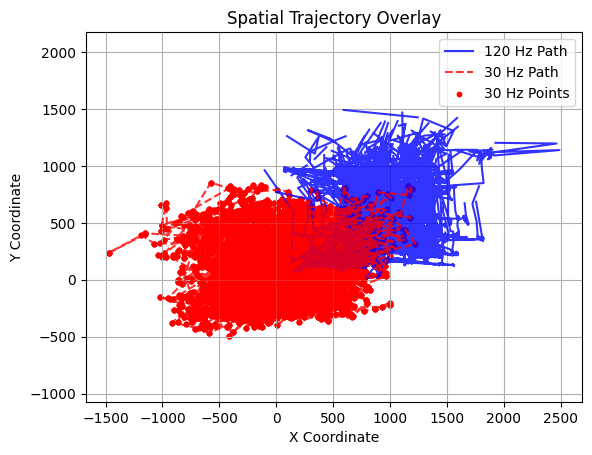

In [ ]:
def _example_use_plot_trajectory_overlay():
    aligned = align_data(tobii_csv, pl_translate_cornered_to_centered(re_csv))
    tobii_sep, re_sep = separate_aligned_to_source(aligned)

    fig, ax = plot_trajectory_overlay(
        tobii_sep,
        re_sep,
        high_freq_x="X_tobii",
        high_freq_y="Y_tobii",
        low_freq_x="X_RE",
        low_freq_y="Y_RE",
    )
    plt.show(fig)


_example_use_plot_trajectory_overlay()

In [ ]:
def plot_aligned_timeseries(
    df_aligned: pl.DataFrame,
    coordinate: str = "x",
    time_col: str = "timestamp",
    **kwargs,
):
    """
    Plots a single coordinate from the aligned high- and low-frequency data over time.

    Args:
        df_aligned: The aligned DataFrame from the align_data() function.
        coordinate: The coordinate to plot ('x' or 'y'). Default is 'x'.
        **kwargs: Additional keyword arguments passed to plt.figure().

    Returns:
        A tuple of (matplotlib.figure.Figure, matplotlib.axes.Axes).
    """
    if coordinate.casefold() not in ["x", "y"]:
        raise ValueError("coordinate must be 'x' or 'y'")

    fig, ax = plt.subplots(**kwargs)

    high_col = f"{coordinate}_tobii"
    low_interp_col = f"{coordinate}_RE_interp"
    low_raw_col = f"{coordinate}_RE"

    ax.plot(
        df_aligned[time_col],
        df_aligned[high_col],
        label="120 Hz Signal",
        color="blue",
        alpha=0.7,
    )
    ax.plot(
        df_aligned[time_col],
        df_aligned[low_interp_col],
        label="30 Hz Signal (Interpolated)",
        color="red",
        linestyle="--",
        alpha=0.9,
    )
    # Plot raw points by using a non-interpolated column, dropping nulls
    ax.scatter(
        df_aligned[time_col],
        df_aligned[low_raw_col],
        label="30 Hz Raw Data Points",
        color="black",
        zorder=5,
        s=1,
    )

    ax.set_title(f"Aligned Time-Series of {coordinate.upper()} Coordinate")
    ax.set_xlabel("Time (seconds)")
    ax.set_ylabel(f"{coordinate.upper()} Coordinate Value")
    ax.legend()
    ax.grid(True)

    return fig, ax

shape: (5, 8)
┌─────────────────┬─────────┬─────────┬──────────────┬──────┬──────┬─────────────┬─────────────┐
│ timestamp_tobii ┆ X_tobii ┆ Y_tobii ┆ timestamp_RE ┆ X_RE ┆ Y_RE ┆ X_RE_interp ┆ Y_RE_interp │
│ ---             ┆ ---     ┆ ---     ┆ ---          ┆ ---  ┆ ---  ┆ ---         ┆ ---         │
│ datetime[μs]    ┆ i32     ┆ i32     ┆ datetime[μs] ┆ i32  ┆ i32  ┆ f64         ┆ f64         │
╞═════════════════╪═════════╪═════════╪══════════════╪══════╪══════╪═════════════╪═════════════╡
│ 2025-03-10      ┆ 1391    ┆ 217     ┆ 2025-03-10   ┆ -187 ┆ 39   ┆ -187.0      ┆ 39.0        │
│ 20:41:24.939259 ┆         ┆         ┆ 20:41:24.936 ┆      ┆      ┆             ┆             │
│ 2025-03-10      ┆ 1392    ┆ 219     ┆ 2025-03-10   ┆ -187 ┆ 39   ┆ -187.0      ┆ 39.0        │
│ 20:41:24.947589 ┆         ┆         ┆ 20:41:24.936 ┆      ┆      ┆             ┆             │
│ 2025-03-10      ┆ 1391    ┆ 224     ┆ 2025-03-10   ┆ -187 ┆ 39   ┆ -187.0      ┆ 39.0        │
│ 20:41:24.955922 ┆         ┆         ┆ 20:41:24.936 ┆      ┆      ┆             ┆             │
│ 2025-03-10      ┆ 1391    ┆ 216     ┆ 2025-03-10   ┆ -187 ┆ 39   ┆ -187.0      ┆ 39.0        │
│ 20:41:24.964255 ┆         ┆         ┆ 20:41:24.936 ┆      ┆      ┆             ┆             │
│ 2025-03-10      ┆ 1389    ┆ 226     ┆ 2025-03-10   ┆ -187 ┆ 39   ┆ -187.0      ┆ 39.0        │
│ 20:41:24.972588 ┆         ┆         ┆ 20:41:24.936 ┆      ┆      ┆             ┆             │
└─────────────────┴─────────┴─────────┴──────────────┴──────┴──────┴─────────────┴─────────────┘

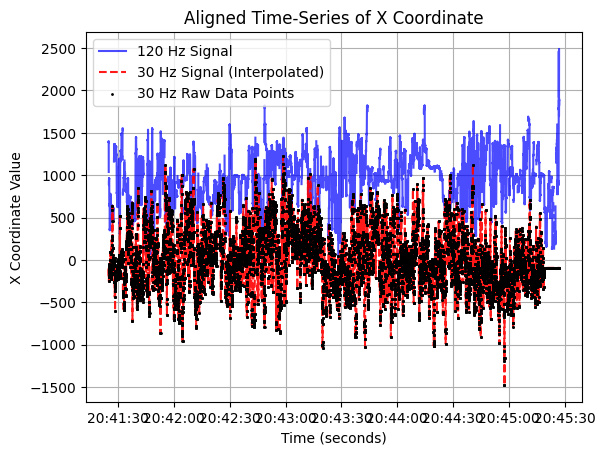

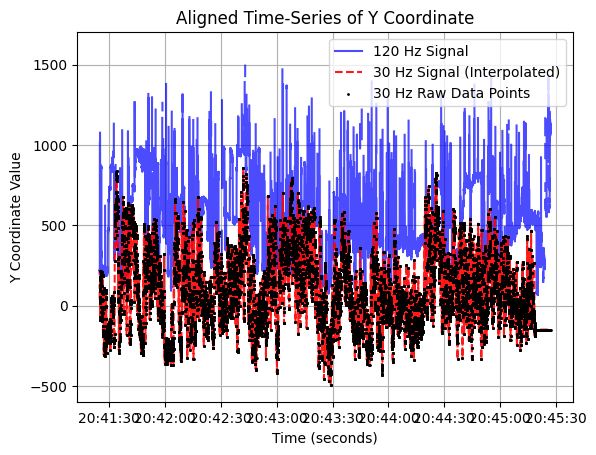

In [276]:
def _example_use_plot_aligned_timeseries():
    aligned = align_data(tobii_csv, pl_translate_cornered_to_centered(re_csv))
    tobii_sep, re_sep = separate_aligned_to_source(aligned)

    display(aligned.head())

    _, ax0 = plot_aligned_timeseries(aligned, "X", "timestamp_tobii")
    plt.show()
    _, ax1 = plot_aligned_timeseries(aligned, "Y", "timestamp_tobii")
    plt.show()


_example_use_plot_aligned_timeseries()

In [292]:
def plot_difference(
    df_aligned: pl.DataFrame,
    coordinate: str = "x",
    time_col: str = "timestamp",
    *, 
    tobii_re_keys: dict[str, str] | None = None,
    **kwargs,
):
    """
    Plots the difference between the high-frequency and interpolated low-frequency signals.

    Args:
        df_aligned: The aligned DataFrame from the align_data() function.
        coordinate: The coordinate to calculate the difference for ('x' or 'y').
        **kwargs: Additional keyword arguments passed to plt.figure().

    Returns:
        A tuple of (matplotlib.figure.Figure, matplotlib.axes.Axes).
    """
    if coordinate.casefold() not in (valids := ["x", "y", "point"]):
        raise ValueError(f"coordinate must be {'or'.join(valids)}")
    
    diff_col = f"{coordinate}_diff"

    fig, ax = plt.subplots(**kwargs)
    if coordinate == "point":
        ...
        key_tobii_x, key_tobii_y, key_RE_x, key_RE_y = [
            tobii_re_keys[k]
            for k in "key_tobii_x, key_tobii_y, key_RE_x, key_RE_y".split(", ")
        ]
        # Pythagorean theorem:                  a^2 + b^2 = c^2
        # Defined with assumed right triangle:  (x1 - x0)^2 + (y1 - y0)^2 = hyp^2
        # Isolate the hypotenuse:           sqrt((x1 - x0)^2 + (y1 - y0)^2) = hyp
        # Distance is hyp:                  distance = hyp # QED
        df_with_diff = df_aligned.with_columns(
            (pl.col(key_tobii_x) - pl.col(key_RE_x)).pow(2).alias("(Δx)^2"),
            (pl.col(key_tobii_y) - pl.col(key_RE_y)).pow(2).alias("(Δy)^2"),
        ).select(
            (pl.col("(Δx)^2") + pl.col("(Δy)^2")).sqrt().alias(diff_col),
            pl.col(time_col),
        )
    else:  # "x" or "y"
        high_col = f"{coordinate}_tobii"
        low_interp_col = f"{coordinate}_RE_interp"

        # Calculate the difference
        df_with_diff = df_aligned.with_columns(
            (pl.col(high_col) - pl.col(low_interp_col)).alias(diff_col)
        )

    ax.plot(
        df_with_diff[time_col],
        df_with_diff[diff_col],
        label=f"{coordinate.upper()}-coordinate difference (120Hz - 30Hz interp.)",
        color="purple",
    )
    ax.axhline(0, color="black", linestyle="--", linewidth=1)

    ax.set_title(f"Difference in {coordinate.upper()} Coordinate Over Time")
    ax.set_xlabel("Time (seconds)")
    ax.set_ylabel("Difference")
    ax.legend()
    ax.grid(True)

    return fig, ax

shape: (10, 8)
┌─────────────────┬─────────┬─────────┬──────────────┬──────┬──────┬─────────────┬─────────────┐
│ timestamp_tobii ┆ X_tobii ┆ Y_tobii ┆ timestamp_RE ┆ X_RE ┆ Y_RE ┆ X_RE_interp ┆ Y_RE_interp │
│ ---             ┆ ---     ┆ ---     ┆ ---          ┆ ---  ┆ ---  ┆ ---         ┆ ---         │
│ datetime[μs]    ┆ i32     ┆ i32     ┆ datetime[μs] ┆ i32  ┆ i32  ┆ f64         ┆ f64         │
╞═════════════════╪═════════╪═════════╪══════════════╪══════╪══════╪═════════════╪═════════════╡
│ 2025-03-10      ┆ 1391    ┆ 217     ┆ 2025-03-10   ┆ -187 ┆ 39   ┆ -187.0      ┆ 39.0        │
│ 20:41:24.939259 ┆         ┆         ┆ 20:41:24.936 ┆      ┆      ┆             ┆             │
│ 2025-03-10      ┆ 1392    ┆ 219     ┆ 2025-03-10   ┆ -187 ┆ 39   ┆ -187.0      ┆ 39.0        │
│ 20:41:24.947589 ┆         ┆         ┆ 20:41:24.936 ┆      ┆      ┆             ┆             │
│ 2025-03-10      ┆ 1391    ┆ 224     ┆ 2025-03-10   ┆ -187 ┆ 39   ┆ -187.0      ┆ 39.0        │
│ 20:41:24.955922 ┆         ┆         ┆ 20:41:24.936 ┆      ┆      ┆             ┆             │
│ 2025-03-10      ┆ 1391    ┆ 216     ┆ 2025-03-10   ┆ -187 ┆ 39   ┆ -187.0      ┆ 39.0        │
│ 20:41:24.964255 ┆         ┆         ┆ 20:41:24.936 ┆      ┆      ┆             ┆             │
│ 2025-03-10      ┆ 1389    ┆ 226     ┆ 2025-03-10   ┆ -187 ┆ 39   ┆ -187.0      ┆ 39.0        │
│ 20:41:24.972588 ┆         ┆         ┆ 20:41:24.936 ┆      ┆      ┆             ┆             │
│ 2025-03-10      ┆ 1389    ┆ 212     ┆ 2025-03-10   ┆ -187 ┆ 39   ┆ -187.0      ┆ 39.0        │
│ 20:41:24.980922 ┆         ┆         ┆ 20:41:24.936 ┆      ┆      ┆             ┆             │
│ 2025-03-10      ┆ 1387    ┆ 215     ┆ 2025-03-10   ┆ -85  ┆ 131  ┆ -85.0       ┆ 131.0       │
│ 20:41:24.989255 ┆         ┆         ┆ 20:41:24.982 ┆      ┆      ┆             ┆             │
│ 2025-03-10      ┆ 1403    ┆ 204     ┆ 2025-03-10   ┆ -85  ┆ 131  ┆ -85.0       ┆ 131.0       │
│ 20:41:24.997588 ┆         ┆         ┆ 20:41:24.982 ┆      ┆      ┆             ┆             │
│ 2025-03-10      ┆ 1390    ┆ 209     ┆ 2025-03-10   ┆ -85  ┆ 131  ┆ -85.0       ┆ 131.0       │
│ 20:41:25.005921 ┆         ┆         ┆ 20:41:24.982 ┆      ┆      ┆             ┆             │
│ 2025-03-10      ┆ 1395    ┆ 193     ┆ 2025-03-10   ┆ -140 ┆ 109  ┆ -140.0      ┆ 109.0       │
│ 20:41:25.014254 ┆         ┆         ┆ 20:41:25.013 ┆      ┆      ┆             ┆             │
└─────────────────┴─────────┴─────────┴──────────────┴──────┴──────┴─────────────┴─────────────┘

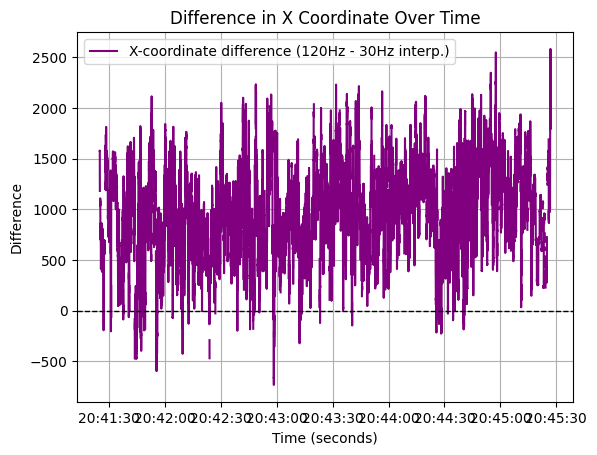

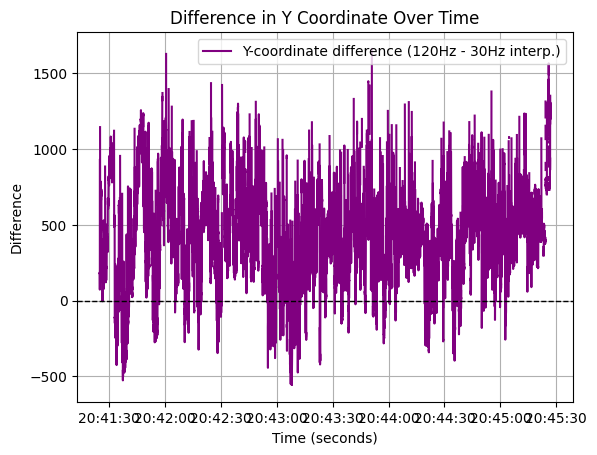

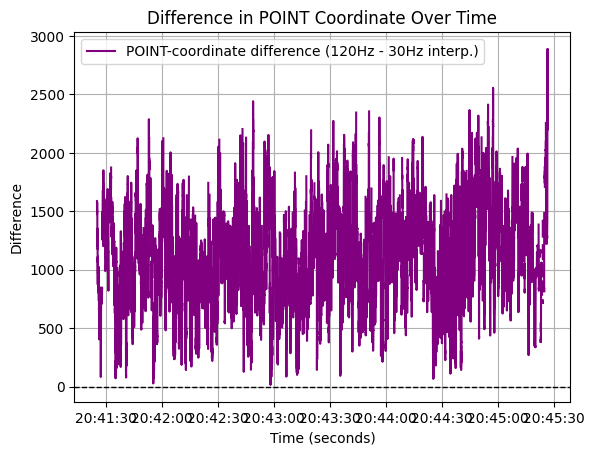

In [ ]:
def _example_use_plot_difference():
    aligned = align_data(tobii_csv, pl_translate_cornered_to_centered(re_csv))
    tobii_sep, re_sep = separate_aligned_to_source(aligned)

    display(aligned.head(10))

    fig, ax = plot_difference(aligned, "X", "timestamp_tobii")
    fig, ax = plot_difference(aligned, "Y", "timestamp_tobii")
    fig, ax = plot_difference(
        aligned,
        "point",
        "timestamp_tobii",
        tobii_re_keys={
            "key_tobii_x": "X_tobii",
            "key_tobii_y": "Y_tobii",
            "key_RE_x": "X_RE",
            "key_RE_y": "Y_RE",
        },
    )
    plt.show(fig)


_example_use_plot_difference()

## Visualization Guantlet

In [311]:
def visualization_guantlet(tobii_df: pl.DataFrame, realeye_df: pl.DataFrame):
    aligned = align_data(tobii_df, pl_translate_cornered_to_centered(realeye_df))


    # visualize the full trajectory, just to get a look at what's up
    tobii_sep, re_sep = separate_aligned_to_source(aligned)
    fig, ax = plot_trajectory_overlay(
        tobii_sep,
        re_sep,
        high_freq_x="X_tobii",
        high_freq_y="Y_tobii",
        low_freq_x="X_RE",
        low_freq_y="Y_RE",
    )
    plt.show(fig)


    # time series alignment by coordinate (doesn't make sense to due the point without an animation)
    display(aligned.head())

    _, ax0 = plot_aligned_timeseries(aligned, "X", "timestamp_tobii")
    plt.show()
    _, ax1 = plot_aligned_timeseries(aligned, "Y", "timestamp_tobii")
    plt.show()

    # coordinate difference comparison
    fig, ax = plot_difference(aligned, "X", "timestamp_tobii")
    fig, ax = plot_difference(aligned, "Y", "timestamp_tobii")
    # point distance-as-difference comparison
    fig, ax = plot_difference(
        aligned,
        "point",
        "timestamp_tobii",
        tobii_re_keys={
            "key_tobii_x": "X_tobii",
            "key_tobii_y": "Y_tobii",
            "key_RE_x": "X_RE",
            "key_RE_y": "Y_RE",
        },
    )
    plt.show(fig)



### Tobii raw + RealEye Raw
For reference. This one should look the least sensible

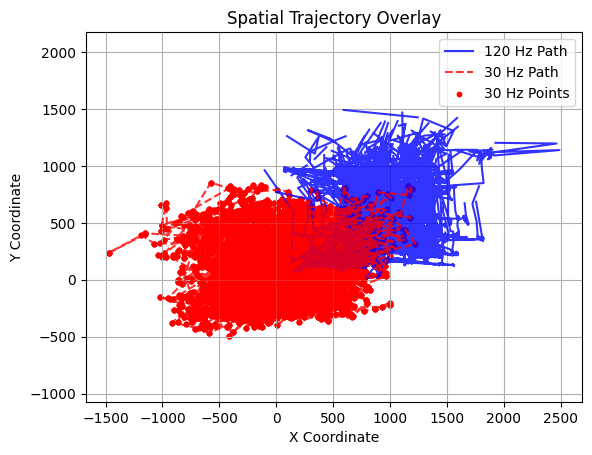

shape: (5, 8)
┌─────────────────┬─────────┬─────────┬──────────────┬──────┬──────┬─────────────┬─────────────┐
│ timestamp_tobii ┆ X_tobii ┆ Y_tobii ┆ timestamp_RE ┆ X_RE ┆ Y_RE ┆ X_RE_interp ┆ Y_RE_interp │
│ ---             ┆ ---     ┆ ---     ┆ ---          ┆ ---  ┆ ---  ┆ ---         ┆ ---         │
│ datetime[μs]    ┆ i32     ┆ i32     ┆ datetime[μs] ┆ i32  ┆ i32  ┆ f64         ┆ f64         │
╞═════════════════╪═════════╪═════════╪══════════════╪══════╪══════╪═════════════╪═════════════╡
│ 2025-03-10      ┆ 1391    ┆ 217     ┆ 2025-03-10   ┆ -187 ┆ 39   ┆ -187.0      ┆ 39.0        │
│ 20:41:24.939259 ┆         ┆         ┆ 20:41:24.936 ┆      ┆      ┆             ┆             │
│ 2025-03-10      ┆ 1392    ┆ 219     ┆ 2025-03-10   ┆ -187 ┆ 39   ┆ -187.0      ┆ 39.0        │
│ 20:41:24.947589 ┆         ┆         ┆ 20:41:24.936 ┆      ┆      ┆             ┆             │
│ 2025-03-10      ┆ 1391    ┆ 224     ┆ 2025-03-10   ┆ -187 ┆ 39   ┆ -187.0      ┆ 39.0        │
│ 20:41:24.955922 ┆         ┆         ┆ 20:41:24.936 ┆      ┆      ┆             ┆             │
│ 2025-03-10      ┆ 1391    ┆ 216     ┆ 2025-03-10   ┆ -187 ┆ 39   ┆ -187.0      ┆ 39.0        │
│ 20:41:24.964255 ┆         ┆         ┆ 20:41:24.936 ┆      ┆      ┆             ┆             │
│ 2025-03-10      ┆ 1389    ┆ 226     ┆ 2025-03-10   ┆ -187 ┆ 39   ┆ -187.0      ┆ 39.0        │
│ 20:41:24.972588 ┆         ┆         ┆ 20:41:24.936 ┆      ┆      ┆             ┆             │
└─────────────────┴─────────┴─────────┴──────────────┴──────┴──────┴─────────────┴─────────────┘

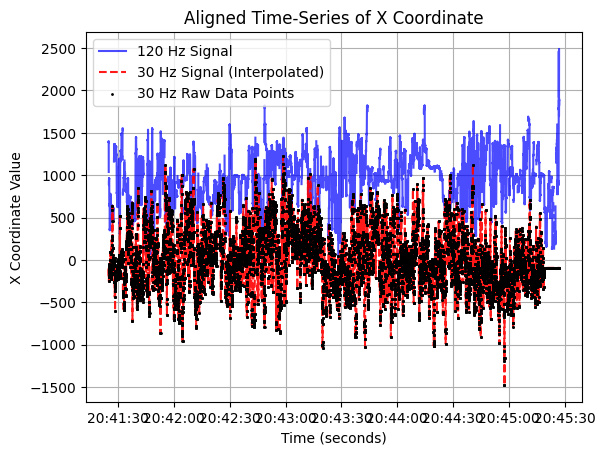

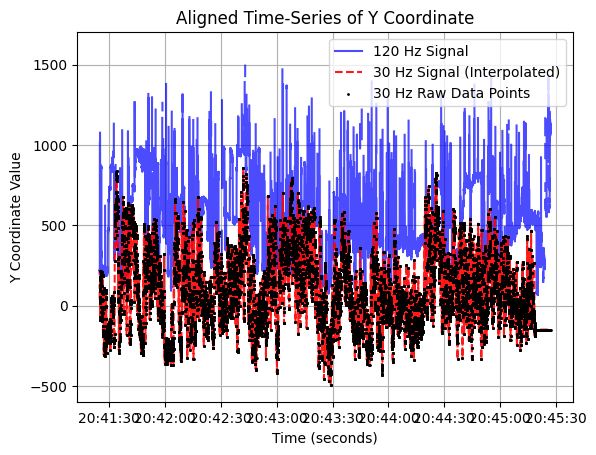

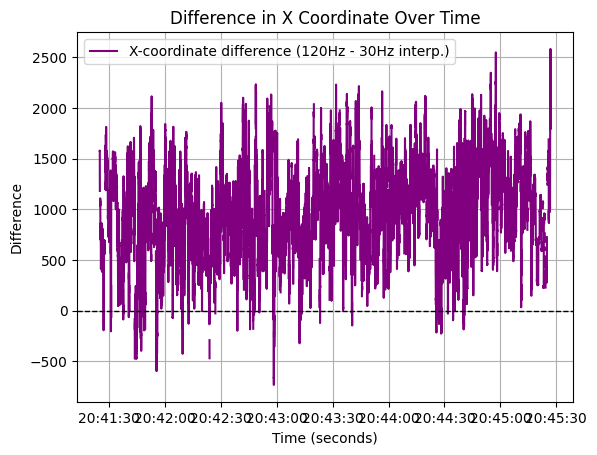

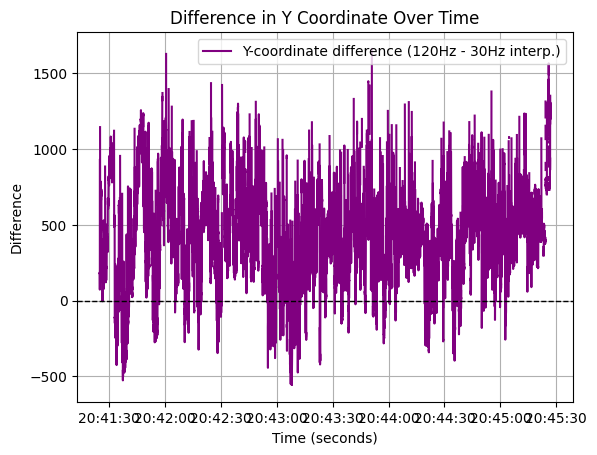

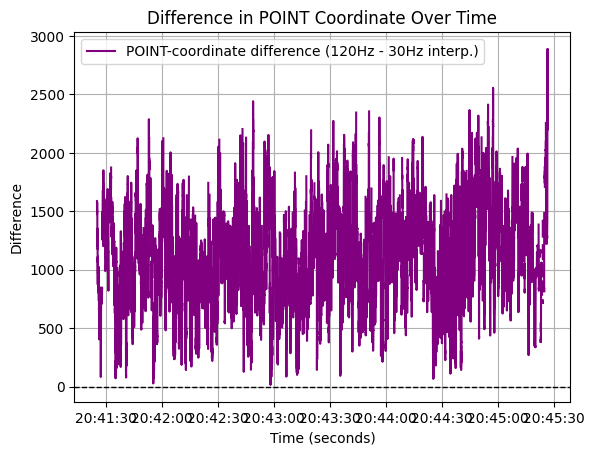

In [312]:
visualization_guantlet(
    tobii_csv,
    re_csv
)

### Tobii raw + RealEye Centered
What should theoretically be all that's needed

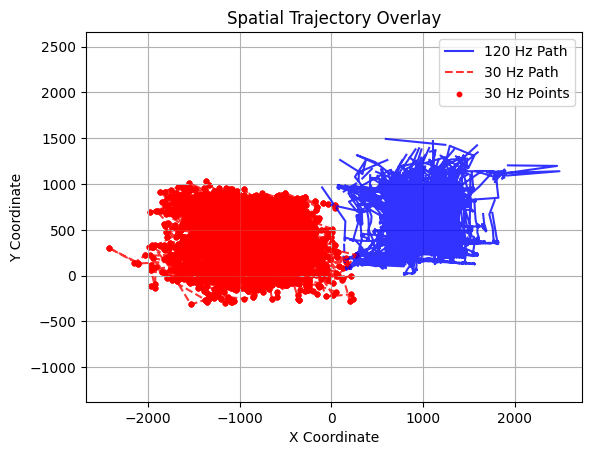

shape: (5, 8)
┌─────────────────┬─────────┬─────────┬──────────────┬───────┬──────┬─────────────┬─────────────┐
│ timestamp_tobii ┆ X_tobii ┆ Y_tobii ┆ timestamp_RE ┆ X_RE  ┆ Y_RE ┆ X_RE_interp ┆ Y_RE_interp │
│ ---             ┆ ---     ┆ ---     ┆ ---          ┆ ---   ┆ ---  ┆ ---         ┆ ---         │
│ datetime[μs]    ┆ i32     ┆ i32     ┆ datetime[μs] ┆ i32   ┆ i32  ┆ f64         ┆ f64         │
╞═════════════════╪═════════╪═════════╪══════════════╪═══════╪══════╪═════════════╪═════════════╡
│ 2025-03-10      ┆ 1391    ┆ 217     ┆ 2025-03-10   ┆ -1147 ┆ 501  ┆ -1147.0     ┆ 501.0       │
│ 20:41:24.939259 ┆         ┆         ┆ 20:41:24.936 ┆       ┆      ┆             ┆             │
│ 2025-03-10      ┆ 1392    ┆ 219     ┆ 2025-03-10   ┆ -1147 ┆ 501  ┆ -1147.0     ┆ 501.0       │
│ 20:41:24.947589 ┆         ┆         ┆ 20:41:24.936 ┆       ┆      ┆             ┆             │
│ 2025-03-10      ┆ 1391    ┆ 224     ┆ 2025-03-10   ┆ -1147 ┆ 501  ┆ -1147.0     ┆ 501.0       │
│ 20:41:24.955922 ┆         ┆         ┆ 20:41:24.936 ┆       ┆      ┆             ┆             │
│ 2025-03-10      ┆ 1391    ┆ 216     ┆ 2025-03-10   ┆ -1147 ┆ 501  ┆ -1147.0     ┆ 501.0       │
│ 20:41:24.964255 ┆         ┆         ┆ 20:41:24.936 ┆       ┆      ┆             ┆             │
│ 2025-03-10      ┆ 1389    ┆ 226     ┆ 2025-03-10   ┆ -1147 ┆ 501  ┆ -1147.0     ┆ 501.0       │
│ 20:41:24.972588 ┆         ┆         ┆ 20:41:24.936 ┆       ┆      ┆             ┆             │
└─────────────────┴─────────┴─────────┴──────────────┴───────┴──────┴─────────────┴─────────────┘

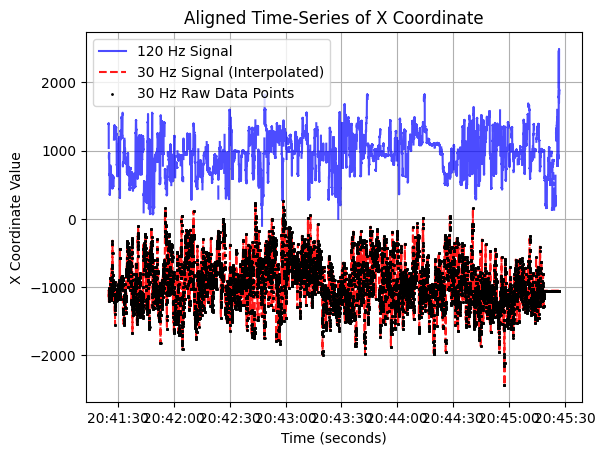

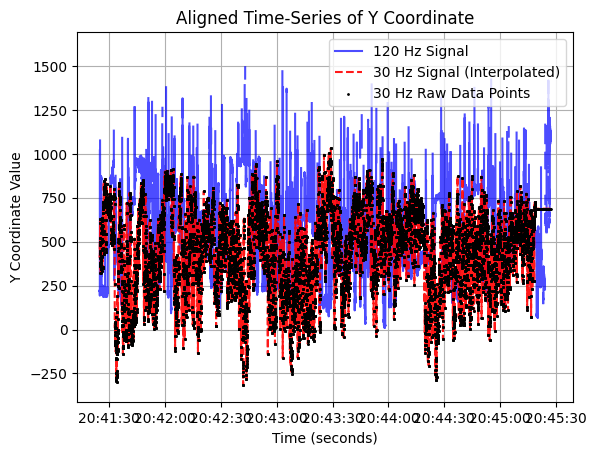

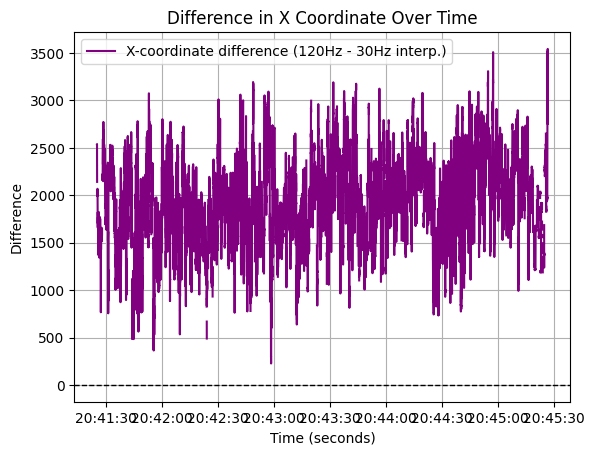

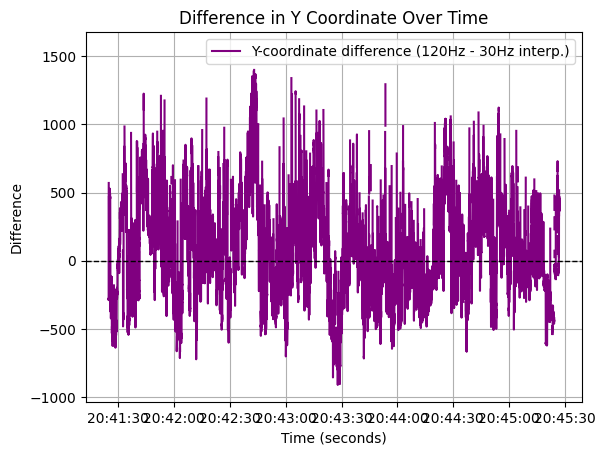

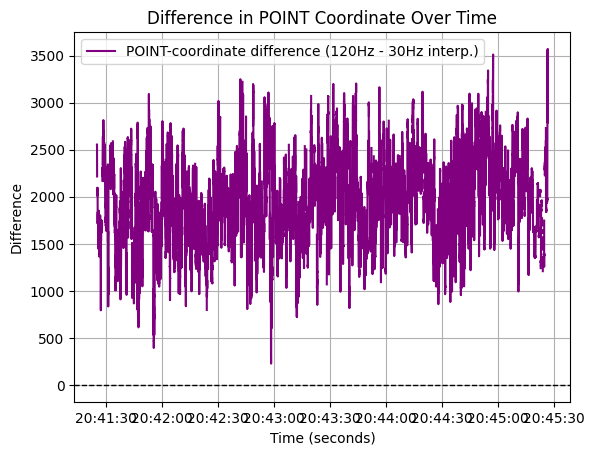

In [316]:
visualization_guantlet(tobii_csv, pl_translate_cornered_to_centered(re_csv))

### Tobii Centered + RealEye Centered
Though it shouldn't need it, the Tobii data doesn't seem to be centered, so I'm going to go about it here.

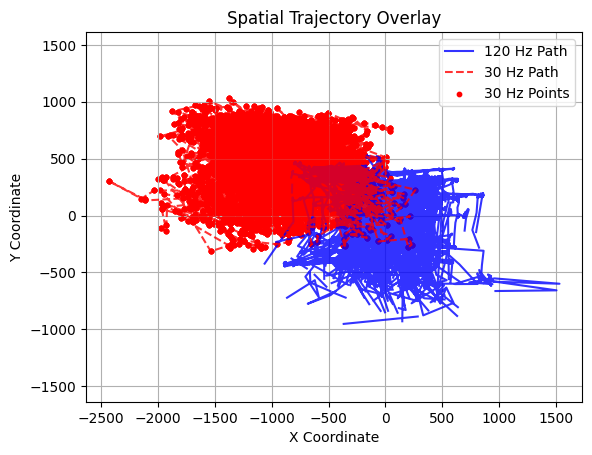

shape: (5, 8)
┌─────────────────┬─────────┬─────────┬──────────────┬───────┬──────┬─────────────┬─────────────┐
│ timestamp_tobii ┆ X_tobii ┆ Y_tobii ┆ timestamp_RE ┆ X_RE  ┆ Y_RE ┆ X_RE_interp ┆ Y_RE_interp │
│ ---             ┆ ---     ┆ ---     ┆ ---          ┆ ---   ┆ ---  ┆ ---         ┆ ---         │
│ datetime[μs]    ┆ i32     ┆ i32     ┆ datetime[μs] ┆ i32   ┆ i32  ┆ f64         ┆ f64         │
╞═════════════════╪═════════╪═════════╪══════════════╪═══════╪══════╪═════════════╪═════════════╡
│ 2025-03-10      ┆ 431     ┆ 323     ┆ 2025-03-10   ┆ -1147 ┆ 501  ┆ -1147.0     ┆ 501.0       │
│ 20:41:24.939259 ┆         ┆         ┆ 20:41:24.936 ┆       ┆      ┆             ┆             │
│ 2025-03-10      ┆ 432     ┆ 321     ┆ 2025-03-10   ┆ -1147 ┆ 501  ┆ -1147.0     ┆ 501.0       │
│ 20:41:24.947589 ┆         ┆         ┆ 20:41:24.936 ┆       ┆      ┆             ┆             │
│ 2025-03-10      ┆ 431     ┆ 316     ┆ 2025-03-10   ┆ -1147 ┆ 501  ┆ -1147.0     ┆ 501.0       │
│ 20:41:24.955922 ┆         ┆         ┆ 20:41:24.936 ┆       ┆      ┆             ┆             │
│ 2025-03-10      ┆ 431     ┆ 324     ┆ 2025-03-10   ┆ -1147 ┆ 501  ┆ -1147.0     ┆ 501.0       │
│ 20:41:24.964255 ┆         ┆         ┆ 20:41:24.936 ┆       ┆      ┆             ┆             │
│ 2025-03-10      ┆ 429     ┆ 314     ┆ 2025-03-10   ┆ -1147 ┆ 501  ┆ -1147.0     ┆ 501.0       │
│ 20:41:24.972588 ┆         ┆         ┆ 20:41:24.936 ┆       ┆      ┆             ┆             │
└─────────────────┴─────────┴─────────┴──────────────┴───────┴──────┴─────────────┴─────────────┘

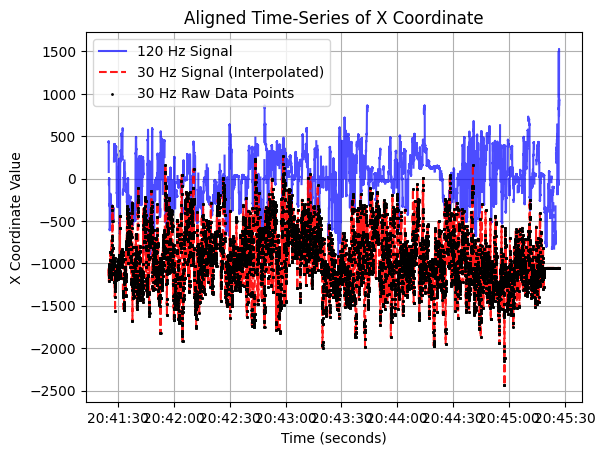

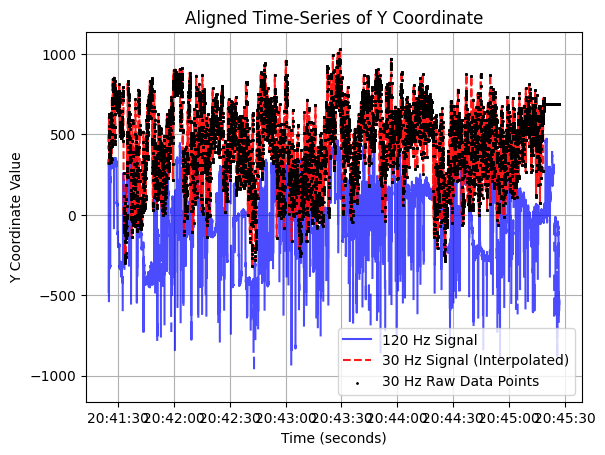

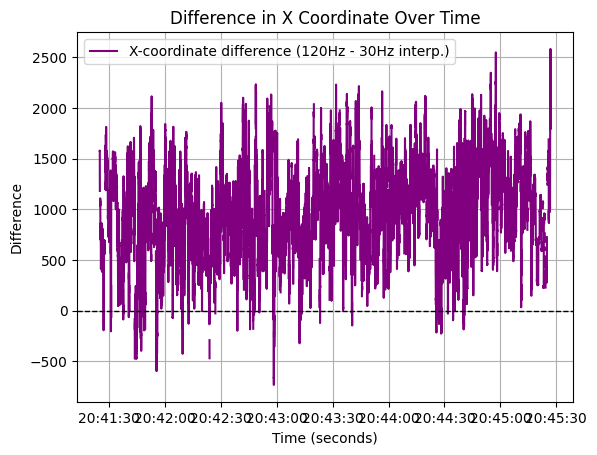

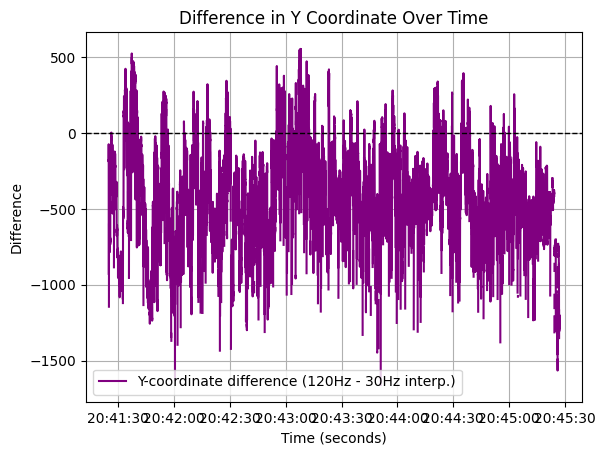

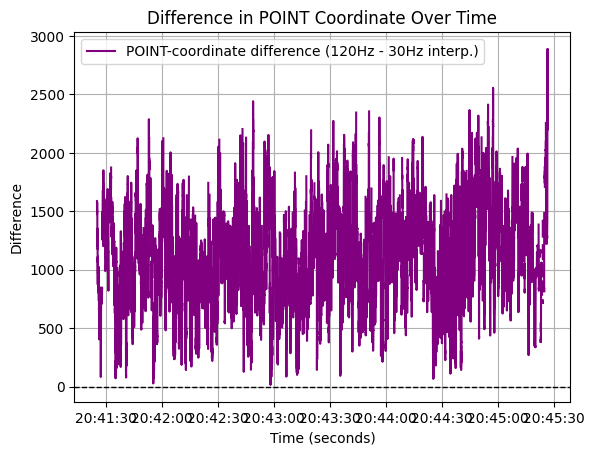

In [317]:
visualization_guantlet(
    pl_translate_cornered_to_centered(tobii_csv),
    pl_translate_cornered_to_centered(re_csv),
)

### Tobii Cornered + RealEye Raw
A potential alternative that makes the (0,0)-corner origin for Matplotlib plotting make some sense
* The origin shouldn't really matter because the points are what they are, but here's the exercise just to be exhaustive.

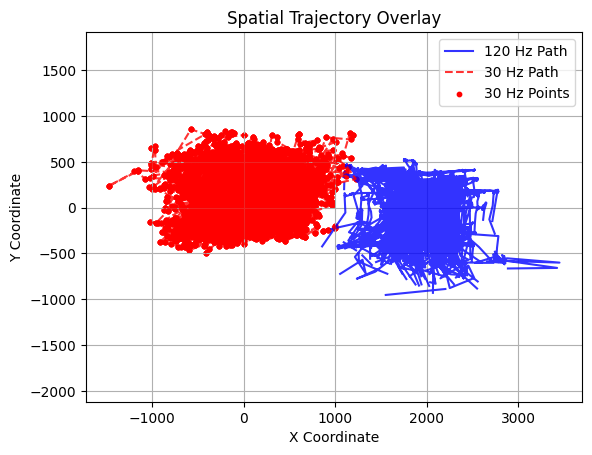

shape: (5, 8)
┌─────────────────┬─────────┬─────────┬──────────────┬──────┬──────┬─────────────┬─────────────┐
│ timestamp_tobii ┆ X_tobii ┆ Y_tobii ┆ timestamp_RE ┆ X_RE ┆ Y_RE ┆ X_RE_interp ┆ Y_RE_interp │
│ ---             ┆ ---     ┆ ---     ┆ ---          ┆ ---  ┆ ---  ┆ ---         ┆ ---         │
│ datetime[μs]    ┆ i32     ┆ i32     ┆ datetime[μs] ┆ i32  ┆ i32  ┆ f64         ┆ f64         │
╞═════════════════╪═════════╪═════════╪══════════════╪══════╪══════╪═════════════╪═════════════╡
│ 2025-03-10      ┆ 2351    ┆ 323     ┆ 2025-03-10   ┆ -187 ┆ 39   ┆ -187.0      ┆ 39.0        │
│ 20:41:24.939259 ┆         ┆         ┆ 20:41:24.936 ┆      ┆      ┆             ┆             │
│ 2025-03-10      ┆ 2352    ┆ 321     ┆ 2025-03-10   ┆ -187 ┆ 39   ┆ -187.0      ┆ 39.0        │
│ 20:41:24.947589 ┆         ┆         ┆ 20:41:24.936 ┆      ┆      ┆             ┆             │
│ 2025-03-10      ┆ 2351    ┆ 316     ┆ 2025-03-10   ┆ -187 ┆ 39   ┆ -187.0      ┆ 39.0        │
│ 20:41:24.955922 ┆         ┆         ┆ 20:41:24.936 ┆      ┆      ┆             ┆             │
│ 2025-03-10      ┆ 2351    ┆ 324     ┆ 2025-03-10   ┆ -187 ┆ 39   ┆ -187.0      ┆ 39.0        │
│ 20:41:24.964255 ┆         ┆         ┆ 20:41:24.936 ┆      ┆      ┆             ┆             │
│ 2025-03-10      ┆ 2349    ┆ 314     ┆ 2025-03-10   ┆ -187 ┆ 39   ┆ -187.0      ┆ 39.0        │
│ 20:41:24.972588 ┆         ┆         ┆ 20:41:24.936 ┆      ┆      ┆             ┆             │
└─────────────────┴─────────┴─────────┴──────────────┴──────┴──────┴─────────────┴─────────────┘

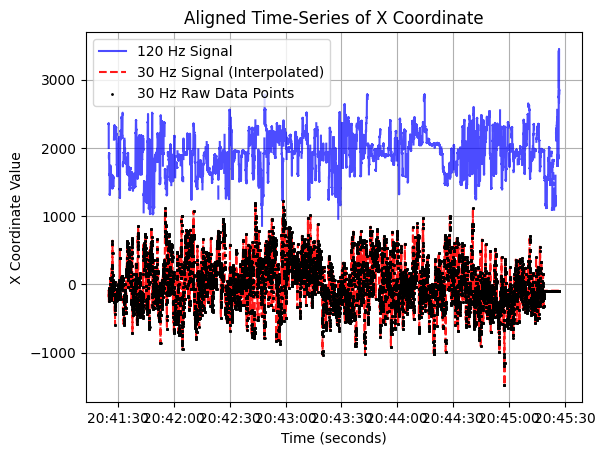

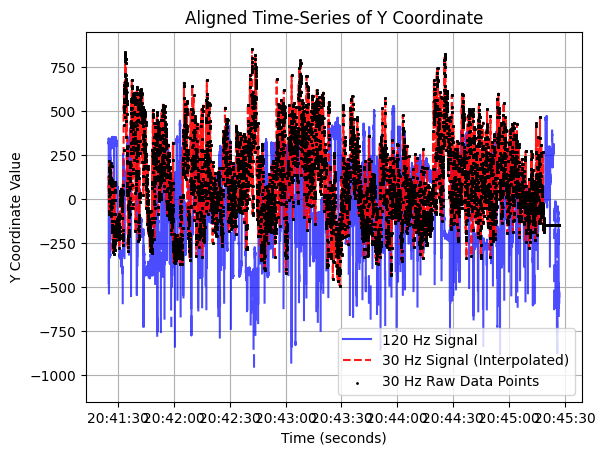

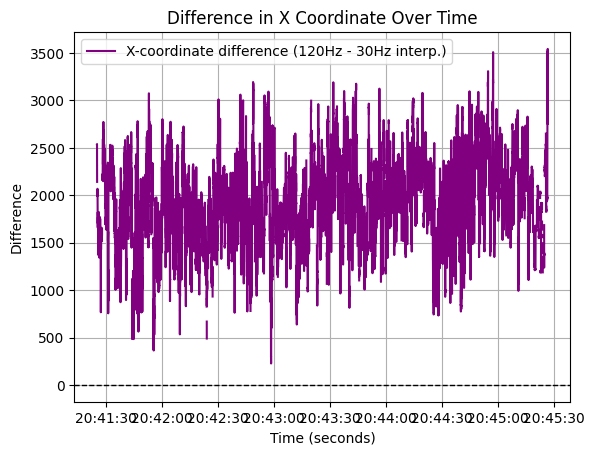

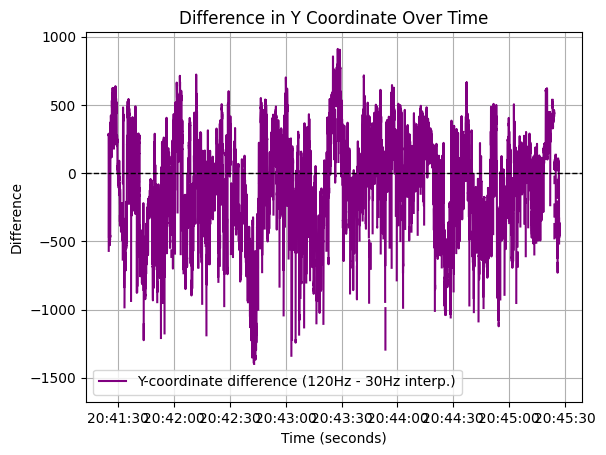

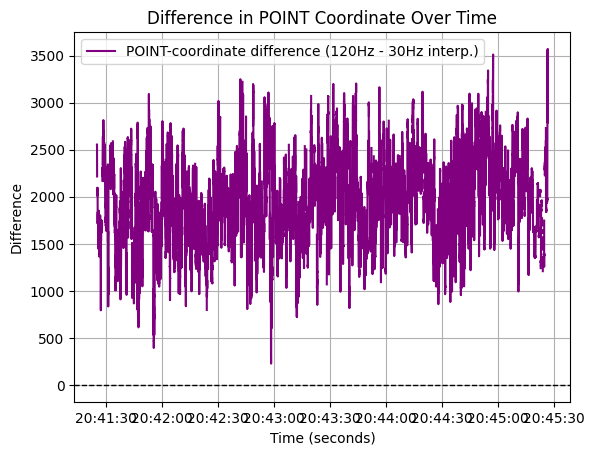

In [318]:
visualization_guantlet(pl_translate_centered_to_cornered(tobii_csv), re_csv)

In [ ]:
def safe_iter(iterable):
    yield from iterable

def test_safe_iter():

    test_eq([1, 2, 3], list(safe_iter(range(1, 4)))) # iterable
    test_eq([1, 2, 3], list(safe_iter(list(range(1, 4))))) # list
    test_eq([1, 2, 3], list(safe_iter(iter(range(1, 4))))) # iterator
    test_eq([1, 2, 3], list(safe_iter(i for i in [1, 2, 3]))) # generator

test_safe_iter()

## Video showing the point stream
Because we need to get something better than a blob on top of another blob

In [ ]:
import matplotlib.animation as animation

In [ ]:
def plot_point_streams_and_make_video(
    img_path: str,
    tobii_xy: pl.DataFrame,
    realeye_xy: pl.DataFrame,
    *,
    # num_frames=240,
    encode_fps=30,  # 4 minutes at 1 point per second
    outputfilename="animation",
    do_blit=True,
    export_fps=60,
):
    # Load the background image
    image = plt.imread(img_path)
    image_width, image_height = (1920, 1080)

    # Set up the figure and axis
    fig, ax = plt.subplots()
    ax.imshow(image)

    # expand the canvas around the image based on the data we've got.
    # TODO: find maximum bounds for the data we've got, so extra/padding outside the stimulus images doesn't vary with the trial
    x_min = min(tobii_xy["X"].min(), realeye_xy["X"].min(), 0)
    ax.set_xlim(x_min, image_width)

    # Invert y-axis to match image coordinates (0,0) at top-left
    y_min = min(tobii_xy["Y"].min(), realeye_xy["Y"].min(), 0)
    y_max = max(image_height, tobii_xy["Y"].max(), realeye_xy["Y"].max())
    ax.set_ylim(image_height, y_min) # 0th arg > 1st arg inverts the axis
    # proof: the following makes the image upside-down...    ax.set_ylim(y_min, image_height)

    # Create scatter plots for red and blue points
    red_scatter = ax.scatter([], [], c="red", s=100, marker="o")
    blue_scatter = ax.scatter([], [], c="blue", s=100, marker="o")

    # Update function for the animation
    def update(frame_tuple):
        tobii_pair, realeye_pair = frame_tuple
        # Update the position of the red and blue points for the current frame
        red_scatter.set_offsets([realeye_pair])
        blue_scatter.set_offsets([tobii_pair])
        return red_scatter, blue_scatter

    # Create the animation
    anim = animation.FuncAnimation(
        fig,
        update,
        frames=zip(tobii_xy.iter_rows(), realeye_xy.iter_rows()),
        # interval is the millisecond gap between frames: fps = 1000/interval <-> 1000/fps = interval
        interval=1000 / encode_fps,
        blit=do_blit,  # ?: should always be true?
    )

    # Save the animation as an MP4 file
    Path(outputfilename).parent.mkdir(exist_ok=True, parents=True)

    anim.save(f"{outputfilename}.mp4", writer="ffmpeg", fps=export_fps)

    plt.close(fig)  # Close the figure to free memory

### Trying for speed with parallelism

In [ ]:
from multiprocessing import Pool

In [ ]:
def parallel_video_generation():
    trial_names = sorted([dir.name for dir in Path(DATA_ROOT).iterdir() if dir.is_dir() and dir.name.startswith("20")])

    def run_video_generation(trial_name: str):
        tobii_df, realeye_df = load_csv_pair(trial_name)
        aligned = align_data((tobii_df), (realeye_df))

        # visualize the full trajectory, just to get a look at what's up
        tobii_sep, re_sep = separate_aligned_to_source(aligned, correct_naming=True)

        hz_tobii = 120
        export_fps = 60  # we can feel this but not see it precisely
        n_seconds = 15 * int(hz_tobii / export_fps)  # 8 second gif takes 270-ish seconds

        print(
            f"Exporting {n_seconds} sec. of footage at {export_fps} fps (or as close as possible thereto)"
        )
        ts = dt_str_now()

        plot_point_streams_and_make_video(
            "/Users/stephen/dev/RevChem Stimuli/Triangle.jpg",
            tobii_sep.drop("timestamp").head(hz_tobii * n_seconds),
            re_sep.drop("timestamp").head(hz_tobii * n_seconds),
            encode_fps=hz_tobii,
            export_fps=export_fps,
            outputfilename=f"/Users/stephen/dev/RevChemData/{date_str_now()}-scatter-plot-blitted/{ts}-{trial_name}-prove-inversion",
            do_blit=False,
        )

    with Pool(processes=4) as pool:

        trial_results = [pool.imap(run_video_generation, trial) for trial in trial_names]
        print([res.get(timeout=1_000 * 60 * 7) for res in trial_results])



# parallel_video_generation()

### Back to regulary scheduled programming

In [ ]:
from RevChem.common import dt_str_now, date_str_now

Exporting 60 sec. of footage at 30 fps (or as close as possible thereto)


In [ ]:
def run_video_generation(trial_name: str):
    tobii_df, realeye_df = load_csv_pair(trial_name)
    aligned = align_data((tobii_df), (realeye_df))

    # visualize the full trajectory, just to get a look at what's up
    tobii_sep, re_sep = separate_aligned_to_source(aligned, correct_naming=True)

    hz_tobii = 120
    export_fps = 30  # we can feel this but not see it precisely
    n_seconds = 15 * int(hz_tobii / export_fps) 

    print(
        f"Exporting {n_seconds} sec. of footage at {export_fps} fps (or as close as possible thereto)"
    )
    ts = dt_str_now()

    plot_point_streams_and_make_video(
        "/Users/stephen/dev/RevChem Stimuli/Triangle.jpg",
        tobii_sep.drop("timestamp").head(hz_tobii * n_seconds),
        re_sep.drop("timestamp").head(hz_tobii * n_seconds),
        encode_fps=hz_tobii,
        export_fps=export_fps,
        outputfilename=f"/Users/stephen/dev/RevChemData/{date_str_now()}-scatter-plot-blitted/{ts}-{trial_name}-prove-inversion",
        do_blit=False,
    )

for trial_name in ["2025-03-05_Blastoise", "2025-03-11_Ninetail", "2025-03-10-Dakrai"]:
    run_video_generation(trial_name)

In [ ]:
# print the trials available
import pprint as pretty_print

['2025-02-19 Pikachu',
 '2025-02-19_Ailleen_RE',
 '2025-02-20_Hannah_tobii1',
 '2025-02-20_PinterestFiend',
 '2025-02-21 Charmander',
 '2025-02-21_Ponyta',
 '2025-02-26_Elinor',
 '2025-02-26_Raichu',
 '2025-02-28_Flute',
 '2025-03-03-H',
 '2025-03-05_Blastoise',
 '2025-03-05_Luna',
 '2025-03-06_Ozempic',
 '2025-03-07-Celebi',
 '2025-03-07-Cyndaquil',
 '2025-03-10-Dakrai',
 '2025-03-11_Ninetail',
 '2025-04-24_Totadile',
 '2025-05-05_Butterfree',
 '2025-05-05_Stephen-Kathy-Control',
 '2025-05-06-Ditto',
 '2025-05-07_Eevee',
 '2025-05-08_Relicanth',
 '2025_03_03_Mew',
 '2025_05_14_Manaphy']


In [ ]:
pretty_print.pprint(
    sorted([dir.name for dir in Path(DATA_ROOT).iterdir() if dir.is_dir() and dir.name.startswith("20")])
)

TODO
- [x] get a full video, rather than a short GIF
    - downloaded FFMPEG onto my machine, then `matplotlib` did the thing
- [x] compare `blit`-ed and non`blit`-ed visualizations
    - `blit` looks smoother, which makes sense because we're only rendering a new dot.
- [ ] Document where this leads us

In [339]:
animation.writers.list()

['pillow', 'html']

### Just the trajectory overlay

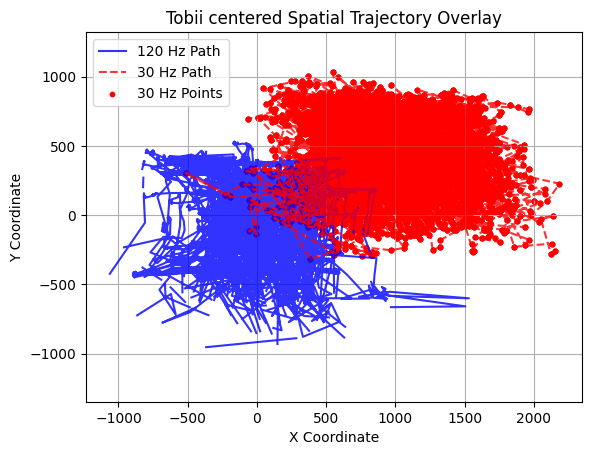

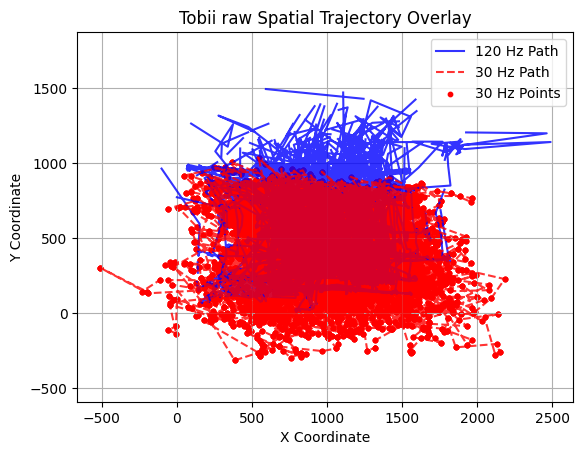

In [401]:
def _testing_a_hypothesis():
    tobii, realeye = load_csv_pair("2025-03-10-Dakrai")

    aligned = align_data((tobii), realeye)
    tobii_sep, re_sep = separate_aligned_to_source(aligned)

    fig, ax = plot_trajectory_overlay(
        pl_translate_cornered_to_centered(tobii_sep, x_name="X_tobii", y_name="Y_tobii"),
        re_sep,
        high_freq_x="X_tobii",
        high_freq_y="Y_tobii",
        low_freq_x="X_RE",
        low_freq_y="Y_RE",
        custom_title="Tobii centered"
    )

    fig, ax = plot_trajectory_overlay(
        tobii_sep,
        re_sep,
        high_freq_x="X_tobii",
        high_freq_y="Y_tobii",
        low_freq_x="X_RE",
        low_freq_y="Y_RE",
        custom_title="Tobii raw"
    )
    plt.show(fig)


_testing_a_hypothesis()

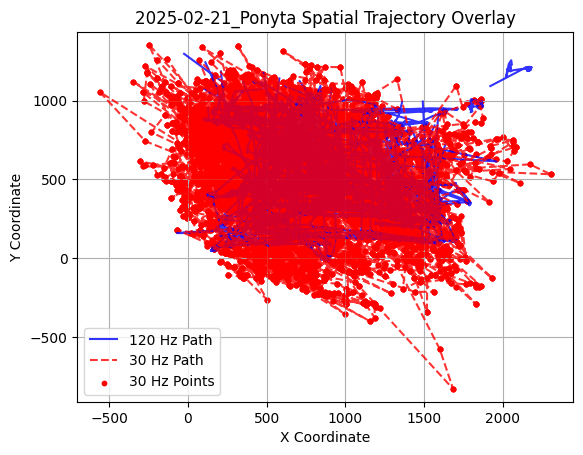

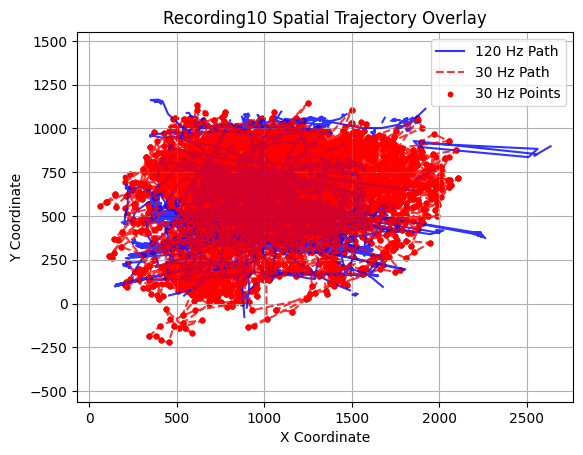

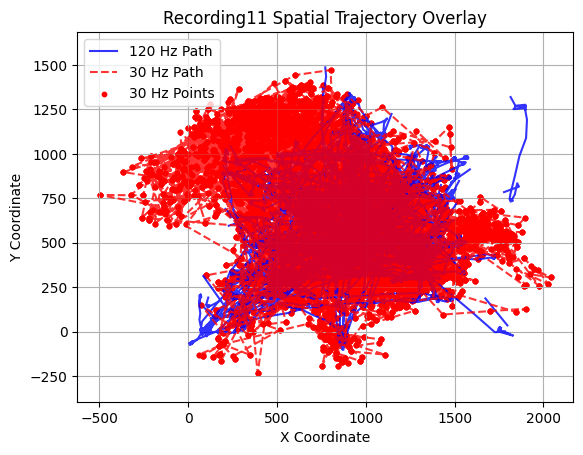

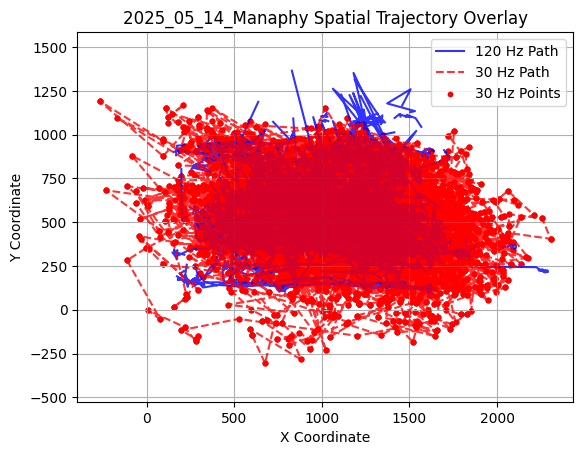

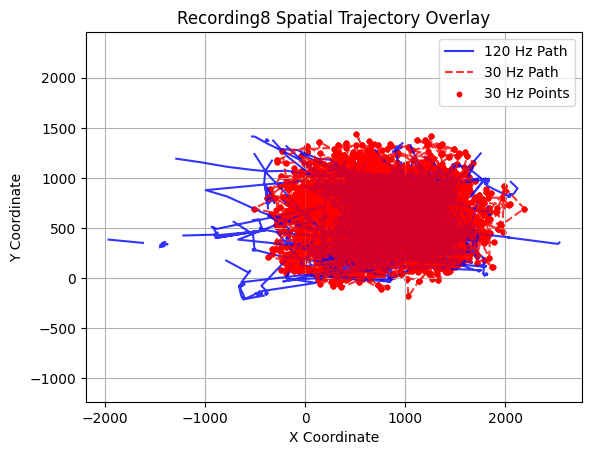

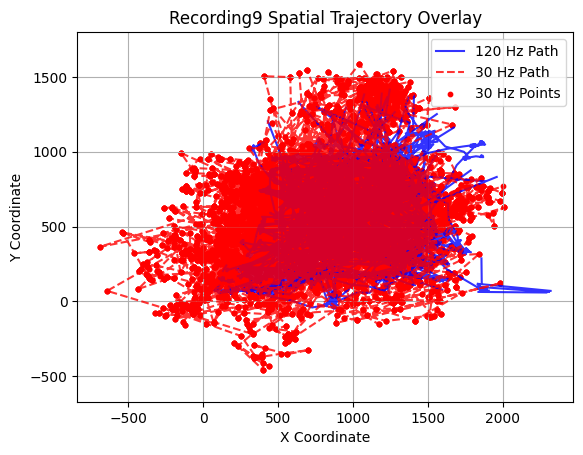

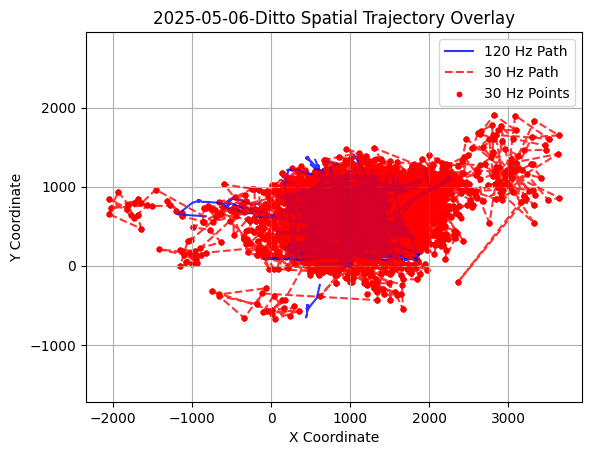

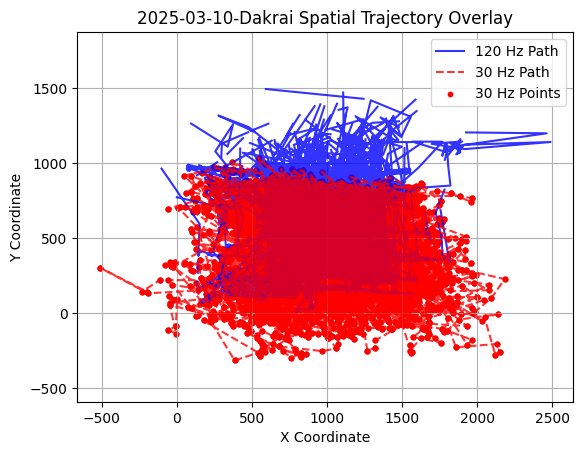

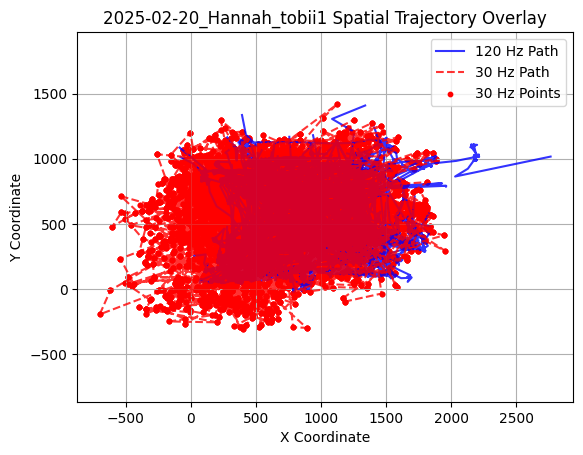

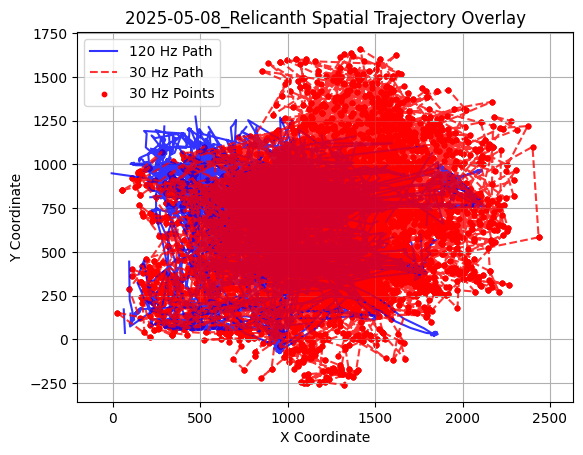

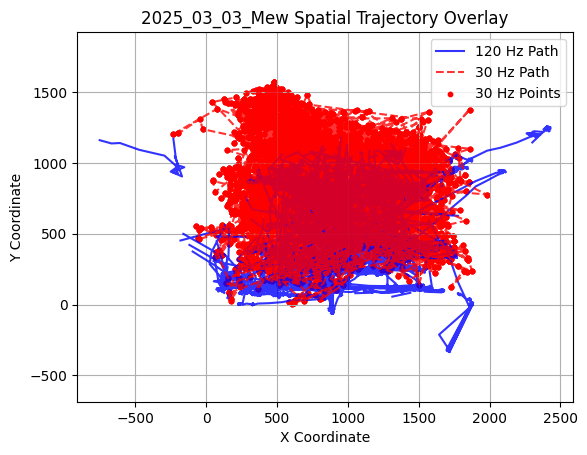

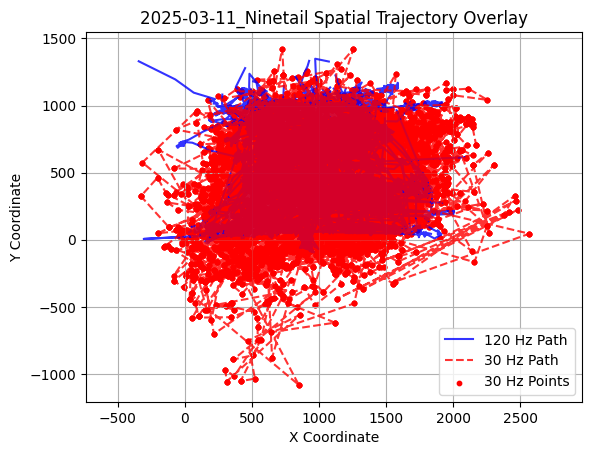

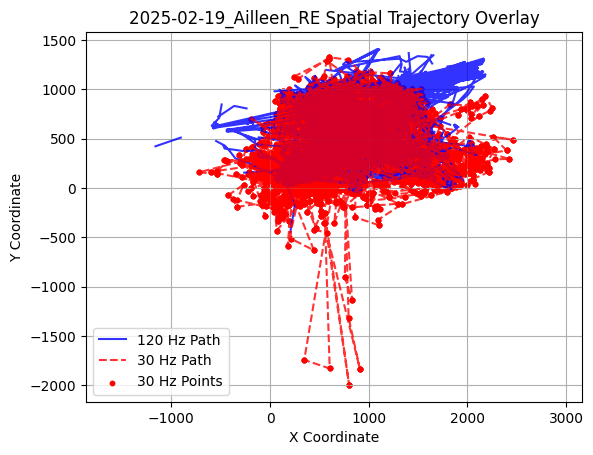

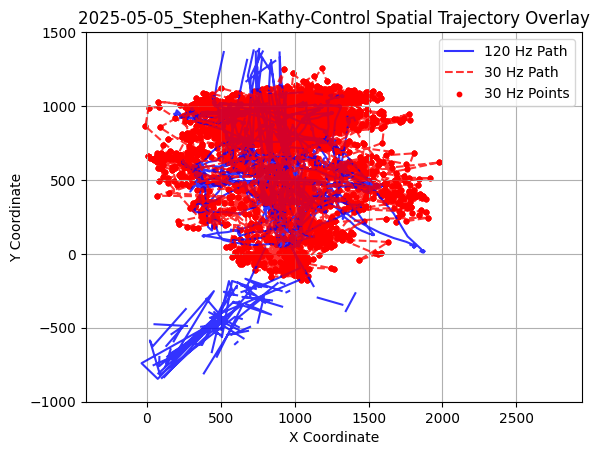

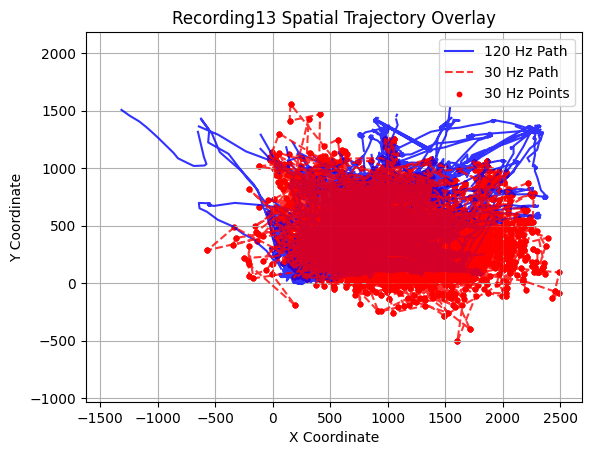

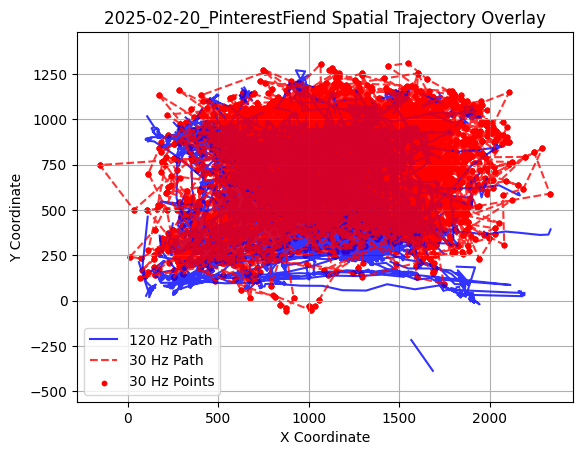

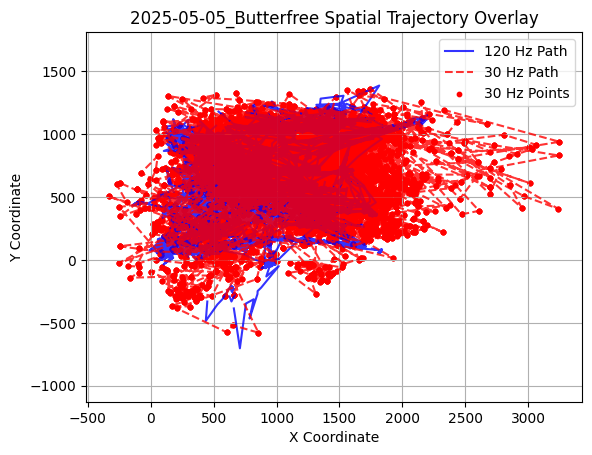

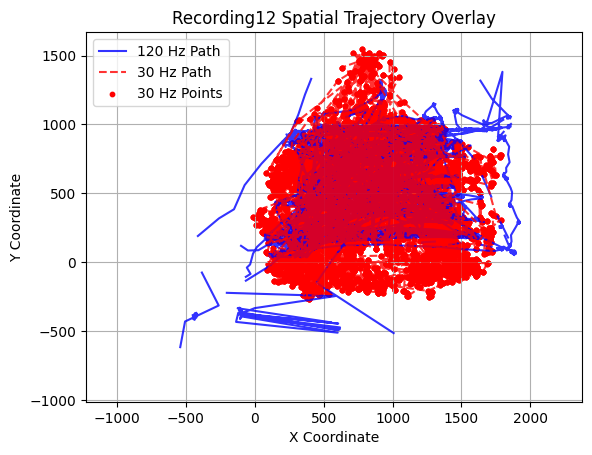

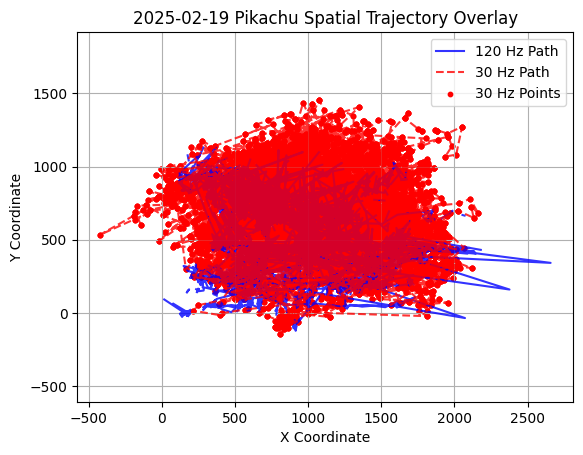

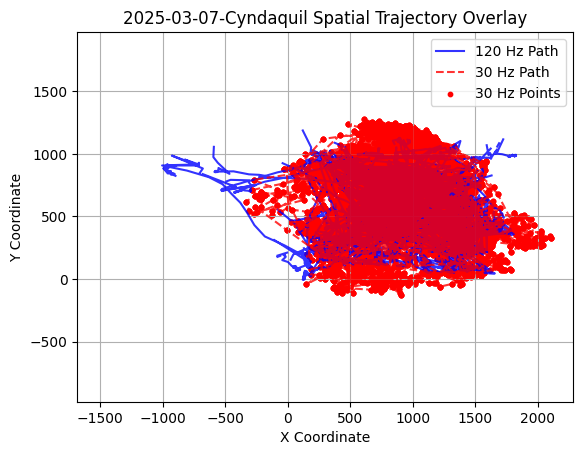

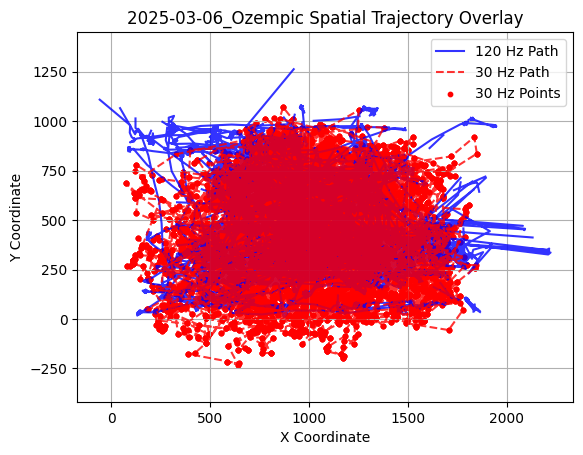

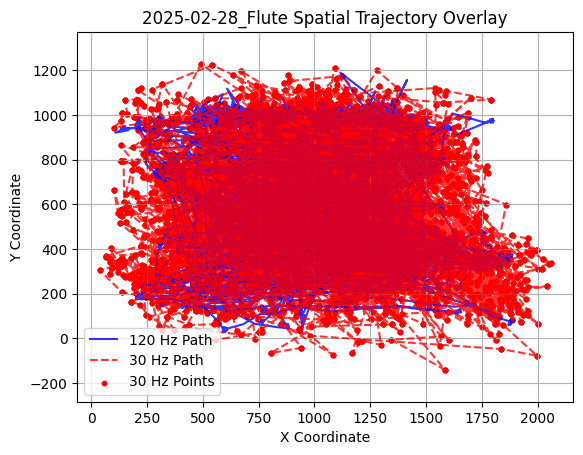

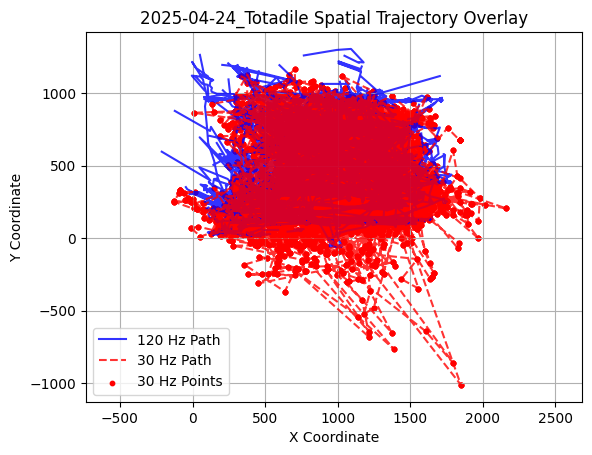

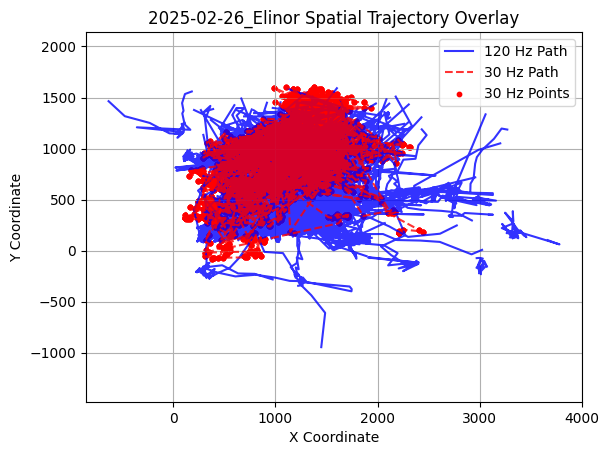

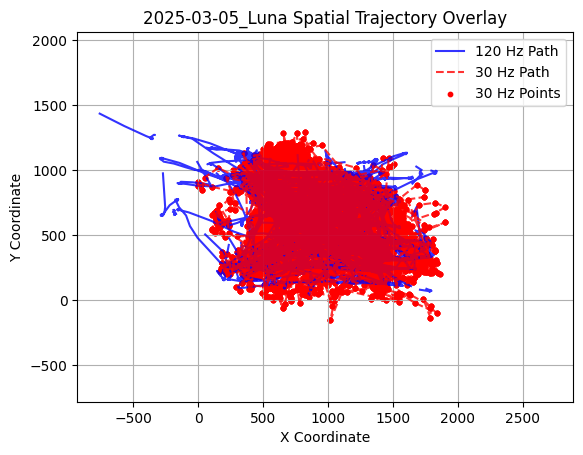

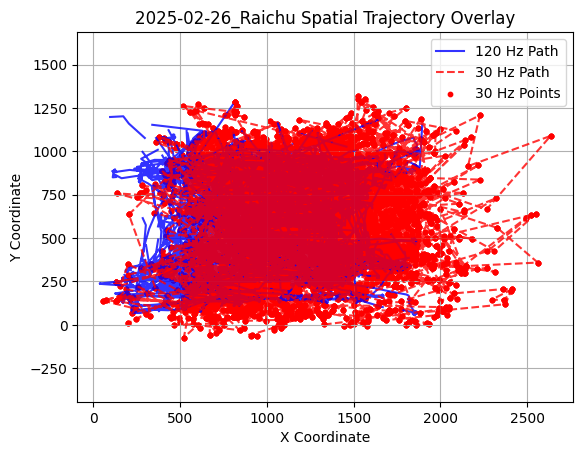

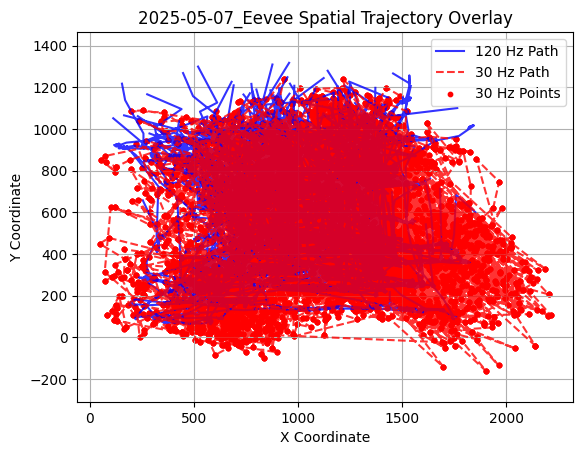

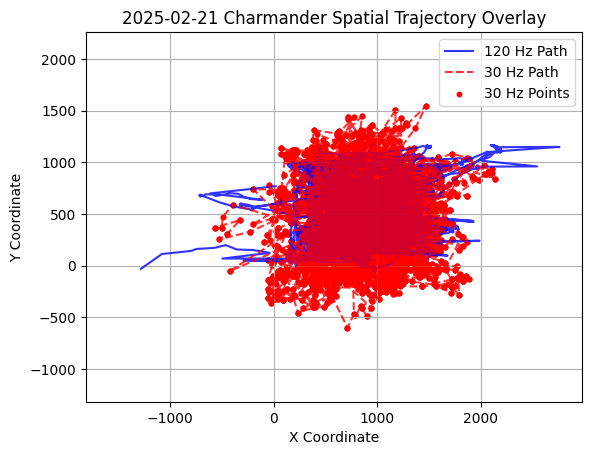

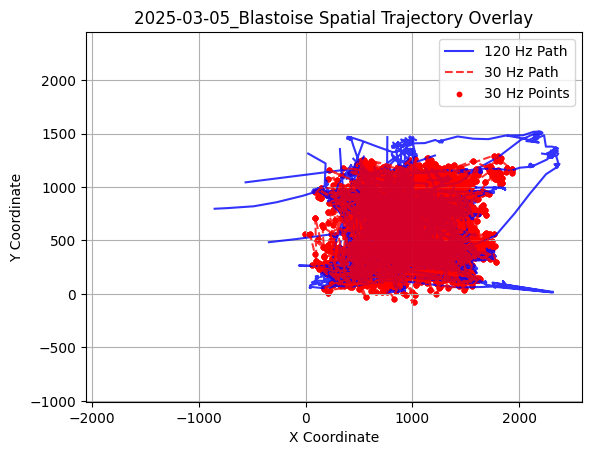

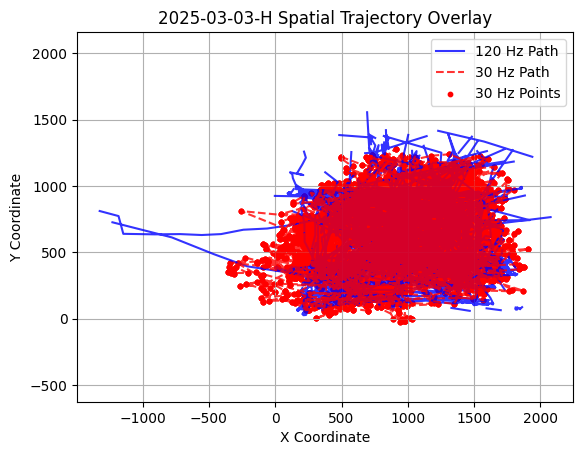

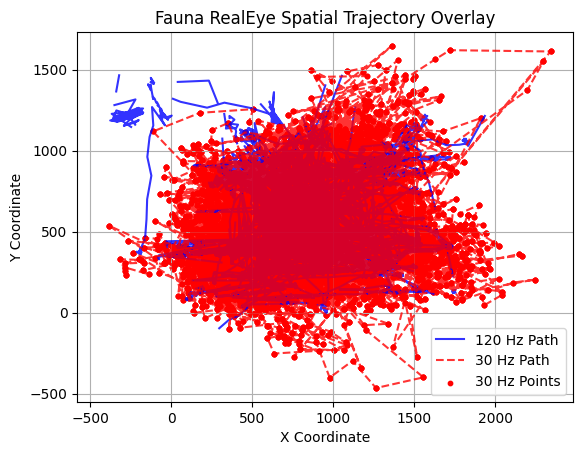

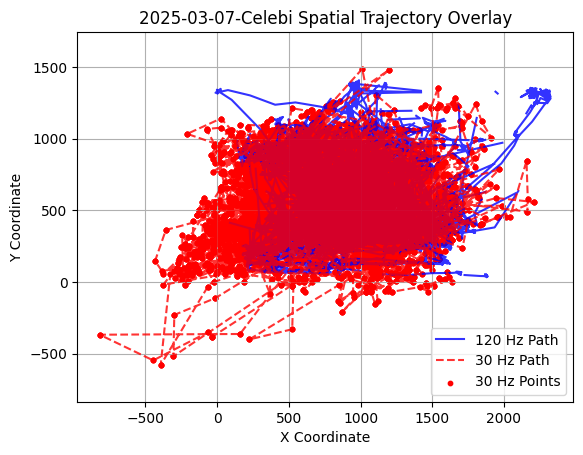

In [402]:
def _visualize_all_overlays():
    for csv_dir in (d for d in Path(DATA_ROOT).iterdir() if d.is_dir() and d.name):
        tobii, realeye = load_csv_pair(csv_dir.name)
        aligned = align_data(tobii, (realeye))
        tobii_sep, re_sep = separate_aligned_to_source(aligned)

        fig, ax = plot_trajectory_overlay(
            tobii_sep,
            re_sep,
            high_freq_x="X_tobii",
            high_freq_y="Y_tobii",
            low_freq_x="X_RE",
            low_freq_y="Y_RE",
            custom_title=csv_dir.name,
        )
        plt.show(fig)

_visualize_all_overlays()

## Scratching out heatmap-related visualizations

In [ ]:
def draw_heatmap_tobii_vs_re(tobii_df: pl.DataFrame, re_df: pl.DataFrame) -> None:
    # Create side-by-side heatmaps
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

    sns.heatmap(tobii_df.drop("timestamp"), ax=ax1, cmap="coolwarm", annot=True)
    sns.heatmap(re_df.drop("timestamp"), ax=ax2, cmap="coolwarm", annot=True)

    ax1.set_title("DataFrame 1")
    ax2.set_title("DataFrame 2")

    plt.tight_layout()
    plt.show()

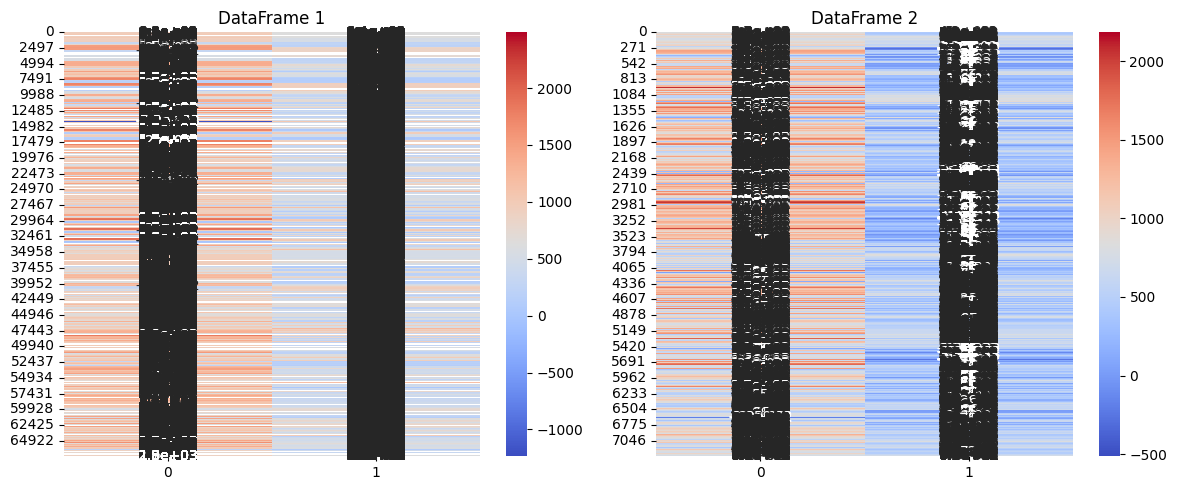

In [56]:
draw_heatmap_tobii_vs_re(tobii_csv, re_csv)

In [ ]:
def draw_all_points_plain(tobii_df: pl.DataFrame, re_df: pl.DataFrame) -> None:
    import matplotlib.pyplot as plt
    import numpy as np

    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 5))

    # Fast rendering regardless of your -1000 to +1000 range
    im1 = ax1.imshow(tobii_df.drop("timestamp"), cmap="RdBu_r", aspect="auto")
    im2 = ax2.imshow(re_df.drop("timestamp"), cmap="RdBu_r", aspect="auto")

    fig.colorbar(im1, ax=[ax1, ax2], shrink=0.8)
    plt.tight_layout()
    plt.show()

<positron-console-cell-63>:12: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.


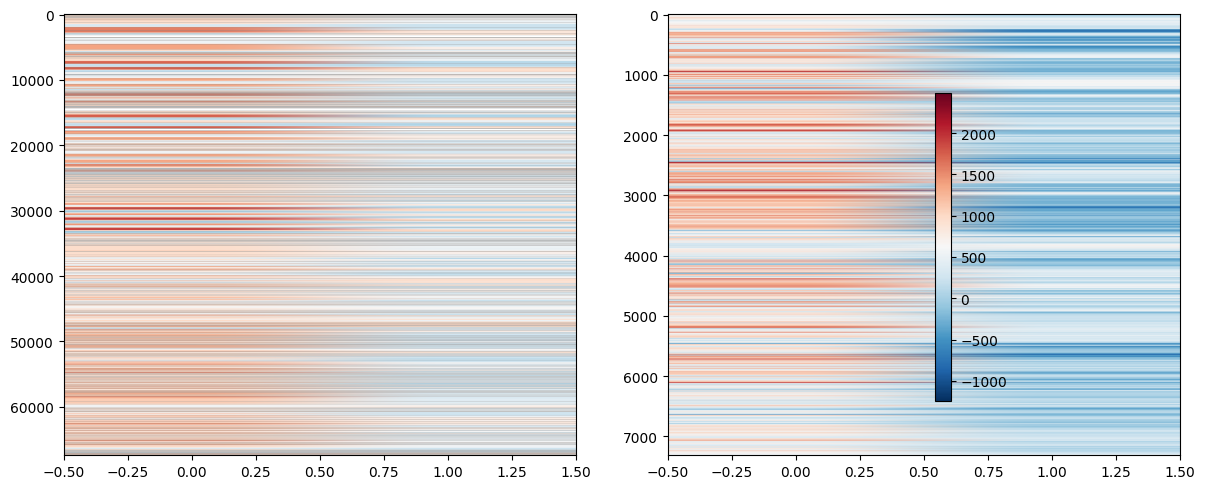

In [63]:
draw_all_points_plain(tobii_csv, re_csv)